# MLPW CW Script

## 1. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import openpyxl

# initial setting
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', None)    # to view features more conveniently

Read data and show features

In [2]:
df = pd.read_excel(io=r'./data/20415880.xlsx')
display(df)
df.columns.values

,Unnamed: 0,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)","('Asset Index from year 2006 to 2018', 2012)","('Asset Index from year 2006 to 2018', 2013)","('Asset Index from year 2006 to 2018', 2014)","('Asset Index from year 2006 to 2018', 2015)","('Asset Index from year 2006 to 2018', 2016)","('Asset Index from year 2006 to 2018', 2017)","('Asset Index from year 2006 to 2018', 2018)","('Leverage Ratio from year 2006 to 2018', 2006)","('Leverage Ratio from year 2006 to 2018', 2007)","('Leverage Ratio from year 2006 to 2018', 2008)","('Leverage Ratio from year 2006 to 2018', 2009)","('Leverage Ratio from year 2006 to 2018', 2010)","('Leverage Ratio from year 2006 to 2018', 2011)","('Leverage Ratio from year 2006 to 2018', 2012)","('Leverage Ratio from year 2006 to 2018', 2013)","('Leverage Ratio from year 2006 to 2018', 2014)","('Leverage Ratio from year 2006 to 2018', 2015)","('Leverage Ratio from year 2006 to 2018', 2016)","('Leverage Ratio from year 2006 to 2018', 2017)","('Leverage Ratio from year 2006 to 2018', 2018)","('Net Profit Ratio from year 2006 to 2018', 2006)","('Net Profit Ratio from year 2006 to 2018', 2007)","('Net Profit Ratio from year 2006 to 2018', 2008)","('Net Profit Ratio from year 2006 to 2018', 2009)","('Net Profit Ratio from year 2006 to 2018', 2010)","('Net Profit Ratio from year 2006 to 2018', 2011)","('Net Profit Ratio from year 2006 to 2018', 2012)","('Net Profit Ratio from year 2006 to 2018', 2013)","('Net Profit Ratio from year 2006 to 2018', 2014)","('Net Profit Ratio from year 2006 to 2018', 2015)","('Net Profit Ratio from year 2006 to 2018', 2016)","('Net Profit Ratio from year 2006 to 2018', 2017)","('Net Profit Ratio from year 2006 to 2018', 2018)","('Growth rate of sales revenue from year 2006 to 2018', 2006)","('Growth rate of sales revenue from year 2006 to 2018', 2007)","('Growth rate of sales revenue from year 2006 to 2018', 2008)","('Growth rate of sales revenue from year 2006 to 2018', 2009)","('Growth rate of sales revenue from year 2006 to 2018', 2010)","('Growth rate of sales revenue from year 2006 to 2018', 2011)","('Growth rate of sales revenue from year 2006 to 2018', 2012)","('Growth rate of sales revenue from year 2006 to 2018', 2013)","('Growth rate of sales revenue from year 2006 to 2018', 2014)","('Growth rate of sales revenue from year 2006 to 2018', 2015)","('Growth rate of sales revenue from year 2006 to 2018', 2016)","('Growth rate of sales revenue from year 2006 to 2018', 2017)","('Growth rate of sales revenue from year 2006 to 2018', 2018)","('Net operating cash flow / Net profit from year 2006 to 2018', 2006)","('Net operating cash flow / Net profit from year 2006 to 2018', 2007)","('Net operating cash flow / Net profit from year 2006 to 2018', 2008)","('Net operating cash flow / Net profit from year 2006 to 2018', 2009)","('Net operating cash flow / Net profit from year 2006 to 2018', 2010)","('Net operating cash flow / Net profit from year 2006 to 2018', 2011)","('Net operating cash flow / Net profit from year 2006 to 2018', 2012)","('Net operating cash flow / Net profit from year 2006 to 2018', 2013)","('Net operating cash flow / Net profit from year 2006 to 2018', 2014)","('Net operating cash flow / Net profit from year 2006 to 2018', 2015)","('Net operating cash flow / Net profit from year 2006 to 2018', 2016)","('Net operating cash flow / Net profit from year 2006 to 2018', 2017)","('Net operating cash flow / Net profit from year 2006 to 2018', 2018)","('Turnover of total assets from year 2006 to 2018', 2006)","('Turnover of total assets from year 2006 to 2018', 2007)","('Turnover of total assets from year 2006 to 2018', 2008)","('Turnover of total assets from year 2006 to 

array(['Unnamed: 0', 'IPO Time', 'Industry', 'Fraud (yes=1,no= #N/A)',
       'Year of Fraud', "('Asset Index from year 2006 to 2018', 2006)",
       "('Asset Index from year 2006 to 2018', 2007)",
       "('Asset Index from year 2006 to 2018', 2008)",
       "('Asset Index from year 2006 to 2018', 2009)",
       "('Asset Index from year 2006 to 2018', 2010)",
       "('Asset Index from year 2006 to 2018', 2011)",
       "('Asset Index from year 2006 to 2018', 2012)",
       "('Asset Index from year 2006 to 2018', 2013)",
       "('Asset Index from year 2006 to 2018', 2014)",
       "('Asset Index from year 2006 to 2018', 2015)",
       "('Asset Index from year 2006 to 2018', 2016)",
       "('Asset Index from year 2006 to 2018', 2017)",
       "('Asset Index from year 2006 to 2018', 2018)",
       "('Leverage Ratio from year 2006 to 2018', 2006)",
       "('Leverage Ratio from year 2006 to 2018', 2007)",
       "('Leverage Ratio from year 2006 to 2018', 2008)",
       "('Leverage Rati

potential features (from now on):
1. IPO Time
2. Industry
3. Asset Index
4. Leverage Ratio
5. Net Profit Ratio
6. Growth rate of sales revenue
7. Net operating cash flow / Net Profit
8. Turnover of total assets
9. Change rate of receivable turnover
10. Inventory Growth Rate
11. Growth rate of accounts receivable
12. Growth rate of sales manegement expenses
13. Whether the audit is conduxted by big 4
14. Time lag of annual report disclosure (days)

In [3]:
# rename the first column and show nulls per column
df.rename(columns={'Unnamed: 0': 'Stock Code'}, inplace=True)
display(df)
df.isnull().sum(axis=0)

,Stock Code,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)","('Asset Index from year 2006 to 2018', 2012)","('Asset Index from year 2006 to 2018', 2013)","('Asset Index from year 2006 to 2018', 2014)","('Asset Index from year 2006 to 2018', 2015)","('Asset Index from year 2006 to 2018', 2016)","('Asset Index from year 2006 to 2018', 2017)","('Asset Index from year 2006 to 2018', 2018)","('Leverage Ratio from year 2006 to 2018', 2006)","('Leverage Ratio from year 2006 to 2018', 2007)","('Leverage Ratio from year 2006 to 2018', 2008)","('Leverage Ratio from year 2006 to 2018', 2009)","('Leverage Ratio from year 2006 to 2018', 2010)","('Leverage Ratio from year 2006 to 2018', 2011)","('Leverage Ratio from year 2006 to 2018', 2012)","('Leverage Ratio from year 2006 to 2018', 2013)","('Leverage Ratio from year 2006 to 2018', 2014)","('Leverage Ratio from year 2006 to 2018', 2015)","('Leverage Ratio from year 2006 to 2018', 2016)","('Leverage Ratio from year 2006 to 2018', 2017)","('Leverage Ratio from year 2006 to 2018', 2018)","('Net Profit Ratio from year 2006 to 2018', 2006)","('Net Profit Ratio from year 2006 to 2018', 2007)","('Net Profit Ratio from year 2006 to 2018', 2008)","('Net Profit Ratio from year 2006 to 2018', 2009)","('Net Profit Ratio from year 2006 to 2018', 2010)","('Net Profit Ratio from year 2006 to 2018', 2011)","('Net Profit Ratio from year 2006 to 2018', 2012)","('Net Profit Ratio from year 2006 to 2018', 2013)","('Net Profit Ratio from year 2006 to 2018', 2014)","('Net Profit Ratio from year 2006 to 2018', 2015)","('Net Profit Ratio from year 2006 to 2018', 2016)","('Net Profit Ratio from year 2006 to 2018', 2017)","('Net Profit Ratio from year 2006 to 2018', 2018)","('Growth rate of sales revenue from year 2006 to 2018', 2006)","('Growth rate of sales revenue from year 2006 to 2018', 2007)","('Growth rate of sales revenue from year 2006 to 2018', 2008)","('Growth rate of sales revenue from year 2006 to 2018', 2009)","('Growth rate of sales revenue from year 2006 to 2018', 2010)","('Growth rate of sales revenue from year 2006 to 2018', 2011)","('Growth rate of sales revenue from year 2006 to 2018', 2012)","('Growth rate of sales revenue from year 2006 to 2018', 2013)","('Growth rate of sales revenue from year 2006 to 2018', 2014)","('Growth rate of sales revenue from year 2006 to 2018', 2015)","('Growth rate of sales revenue from year 2006 to 2018', 2016)","('Growth rate of sales revenue from year 2006 to 2018', 2017)","('Growth rate of sales revenue from year 2006 to 2018', 2018)","('Net operating cash flow / Net profit from year 2006 to 2018', 2006)","('Net operating cash flow / Net profit from year 2006 to 2018', 2007)","('Net operating cash flow / Net profit from year 2006 to 2018', 2008)","('Net operating cash flow / Net profit from year 2006 to 2018', 2009)","('Net operating cash flow / Net profit from year 2006 to 2018', 2010)","('Net operating cash flow / Net profit from year 2006 to 2018', 2011)","('Net operating cash flow / Net profit from year 2006 to 2018', 2012)","('Net operating cash flow / Net profit from year 2006 to 2018', 2013)","('Net operating cash flow / Net profit from year 2006 to 2018', 2014)","('Net operating cash flow / Net profit from year 2006 to 2018', 2015)","('Net operating cash flow / Net profit from year 2006 to 2018', 2016)","('Net operating cash flow / Net profit from year 2006 to 2018', 2017)","('Net operating cash flow / Net profit from year 2006 to 2018', 2018)","('Turnover of total assets from year 2006 to 2018', 2006)","('Turnover of total assets from year 2006 to 2018', 2007)","('Turnover of total assets from year 2006 to 2018', 2008)","('Turnover of total assets from year 2006 to 

Stock Code                                                                         0
IPO Time                                                                           0
Industry                                                                           0
Fraud (yes=1,no= #N/A)                                                             0
Year of Fraud                                                                   1862
                                                                                ... 
('Time lag of annual report disclosure (days) from year 2006 to 2018', 2014)      77
('Time lag of annual report disclosure (days) from year 2006 to 2018', 2015)      52
('Time lag of annual report disclosure (days) from year 2006 to 2018', 2016)       0
('Time lag of annual report disclosure (days) from year 2006 to 2018', 2017)       0
('Time lag of annual report disclosure (days) from year 2006 to 2018', 2018)       0
Length: 161, dtype: int64

Data cleaning assumed work flow:
1. Unfold "Year of Fraud" column: create 14 new column to represent fraud status of each year (2007-2019) and before 2007 (because the features are from 2006 to 2018, the corresponding y should be 2007-2019)
2. Unfold (12) features per year, in other word, create a new dataframe with 13 year features, IPO time, Industry, Has there been any fraud before (to avoid lose feature before 2006 and avoid fraud information after that year) as X, fraud status **(next year)** as y
3. deal with null (Nan, ...) data (delete or fill)
4. y balacing
5. delete unimportant columns (features)

###  Then start the step 1 (0 stands for no, 1 stands for yes)

In [4]:
# initialise the columns

df['Fraud Status before 2007'] = 0
for i in range(2007, 2020):
    df['Fraud Status of ' + str(i)] = 0

for i in range(len(df)):
    yof = str(df.iloc[i, 4])
    if yof == 'nan' or yof == '0':
        continue
    
    list_yof = yof.split(sep=',')
    
    # start the search from 1980 (estimated) to 2006
    for j in range(1980, 2007):
        if str(j) in list_yof:
            df.iloc[i, 161] = 1
            break
            
    # search fraud status every year from 2006
    for j in range(2007, 2020):
        if str(j) in list_yof:
            # hardcoded to find "Fraud Status of ..."columns
            df.iloc[i, (j-1845)] = 1

df

,Stock Code,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)","('Asset Index from year 2006 to 2018', 2012)","('Asset Index from year 2006 to 2018', 2013)","('Asset Index from year 2006 to 2018', 2014)","('Asset Index from year 2006 to 2018', 2015)","('Asset Index from year 2006 to 2018', 2016)","('Asset Index from year 2006 to 2018', 2017)","('Asset Index from year 2006 to 2018', 2018)","('Leverage Ratio from year 2006 to 2018', 2006)","('Leverage Ratio from year 2006 to 2018', 2007)","('Leverage Ratio from year 2006 to 2018', 2008)","('Leverage Ratio from year 2006 to 2018', 2009)","('Leverage Ratio from year 2006 to 2018', 2010)","('Leverage Ratio from year 2006 to 2018', 2011)","('Leverage Ratio from year 2006 to 2018', 2012)","('Leverage Ratio from year 2006 to 2018', 2013)","('Leverage Ratio from year 2006 to 2018', 2014)","('Leverage Ratio from year 2006 to 2018', 2015)","('Leverage Ratio from year 2006 to 2018', 2016)","('Leverage Ratio from year 2006 to 2018', 2017)","('Leverage Ratio from year 2006 to 2018', 2018)","('Net Profit Ratio from year 2006 to 2018', 2006)","('Net Profit Ratio from year 2006 to 2018', 2007)","('Net Profit Ratio from year 2006 to 2018', 2008)","('Net Profit Ratio from year 2006 to 2018', 2009)","('Net Profit Ratio from year 2006 to 2018', 2010)","('Net Profit Ratio from year 2006 to 2018', 2011)","('Net Profit Ratio from year 2006 to 2018', 2012)","('Net Profit Ratio from year 2006 to 2018', 2013)","('Net Profit Ratio from year 2006 to 2018', 2014)","('Net Profit Ratio from year 2006 to 2018', 2015)","('Net Profit Ratio from year 2006 to 2018', 2016)","('Net Profit Ratio from year 2006 to 2018', 2017)","('Net Profit Ratio from year 2006 to 2018', 2018)","('Growth rate of sales revenue from year 2006 to 2018', 2006)","('Growth rate of sales revenue from year 2006 to 2018', 2007)","('Growth rate of sales revenue from year 2006 to 2018', 2008)","('Growth rate of sales revenue from year 2006 to 2018', 2009)","('Growth rate of sales revenue from year 2006 to 2018', 2010)","('Growth rate of sales revenue from year 2006 to 2018', 2011)","('Growth rate of sales revenue from year 2006 to 2018', 2012)","('Growth rate of sales revenue from year 2006 to 2018', 2013)","('Growth rate of sales revenue from year 2006 to 2018', 2014)","('Growth rate of sales revenue from year 2006 to 2018', 2015)","('Growth rate of sales revenue from year 2006 to 2018', 2016)","('Growth rate of sales revenue from year 2006 to 2018', 2017)","('Growth rate of sales revenue from year 2006 to 2018', 2018)","('Net operating cash flow / Net profit from year 2006 to 2018', 2006)","('Net operating cash flow / Net profit from year 2006 to 2018', 2007)","('Net operating cash flow / Net profit from year 2006 to 2018', 2008)","('Net operating cash flow / Net profit from year 2006 to 2018', 2009)","('Net operating cash flow / Net profit from year 2006 to 2018', 2010)","('Net operating cash flow / Net profit from year 2006 to 2018', 2011)","('Net operating cash flow / Net profit from year 2006 to 2018', 2012)","('Net operating cash flow / Net profit from year 2006 to 2018', 2013)","('Net operating cash flow / Net profit from year 2006 to 2018', 2014)","('Net operating cash flow / Net profit from year 2006 to 2018', 2015)","('Net operating cash flow / Net profit from year 2006 to 2018', 2016)","('Net operating cash flow / Net profit from year 2006 to 2018', 2017)","('Net operating cash flow / Net profit from year 2006 to 2018', 2018)","('Turnover of total assets from year 2006 to 2018', 2006)","('Turnover of total assets from year 2006 to 2018', 2007)","('Turnover of total assets from year 2006 to 2018', 2008)","('Turnover of total assets from year 2006 to 

It is noticed that there are rows with ***Fraud*** = 1 but ***Year of Fraud*** = 0. Because we do not know what this data means, these rows are deleted so as not to affect training.

The other thing to note is, a company could have a fraud before 2006 or after a certain year (future feature which cannot be an input). Therefore, there should be a feature which represents whether the company had had a fraud before a certain year.

In [5]:
df.drop(df[df['Year of Fraud'] == '0'].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Stock Code,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)","('Asset Index from year 2006 to 2018', 2012)","('Asset Index from year 2006 to 2018', 2013)","('Asset Index from year 2006 to 2018', 2014)","('Asset Index from year 2006 to 2018', 2015)","('Asset Index from year 2006 to 2018', 2016)","('Asset Index from year 2006 to 2018', 2017)","('Asset Index from year 2006 to 2018', 2018)","('Leverage Ratio from year 2006 to 2018', 2006)","('Leverage Ratio from year 2006 to 2018', 2007)","('Leverage Ratio from year 2006 to 2018', 2008)","('Leverage Ratio from year 2006 to 2018', 2009)","('Leverage Ratio from year 2006 to 2018', 2010)","('Leverage Ratio from year 2006 to 2018', 2011)","('Leverage Ratio from year 2006 to 2018', 2012)","('Leverage Ratio from year 2006 to 2018', 2013)","('Leverage Ratio from year 2006 to 2018', 2014)","('Leverage Ratio from year 2006 to 2018', 2015)","('Leverage Ratio from year 2006 to 2018', 2016)","('Leverage Ratio from year 2006 to 2018', 2017)","('Leverage Ratio from year 2006 to 2018', 2018)","('Net Profit Ratio from year 2006 to 2018', 2006)","('Net Profit Ratio from year 2006 to 2018', 2007)","('Net Profit Ratio from year 2006 to 2018', 2008)","('Net Profit Ratio from year 2006 to 2018', 2009)","('Net Profit Ratio from year 2006 to 2018', 2010)","('Net Profit Ratio from year 2006 to 2018', 2011)","('Net Profit Ratio from year 2006 to 2018', 2012)","('Net Profit Ratio from year 2006 to 2018', 2013)","('Net Profit Ratio from year 2006 to 2018', 2014)","('Net Profit Ratio from year 2006 to 2018', 2015)","('Net Profit Ratio from year 2006 to 2018', 2016)","('Net Profit Ratio from year 2006 to 2018', 2017)","('Net Profit Ratio from year 2006 to 2018', 2018)","('Growth rate of sales revenue from year 2006 to 2018', 2006)","('Growth rate of sales revenue from year 2006 to 2018', 2007)","('Growth rate of sales revenue from year 2006 to 2018', 2008)","('Growth rate of sales revenue from year 2006 to 2018', 2009)","('Growth rate of sales revenue from year 2006 to 2018', 2010)","('Growth rate of sales revenue from year 2006 to 2018', 2011)","('Growth rate of sales revenue from year 2006 to 2018', 2012)","('Growth rate of sales revenue from year 2006 to 2018', 2013)","('Growth rate of sales revenue from year 2006 to 2018', 2014)","('Growth rate of sales revenue from year 2006 to 2018', 2015)","('Growth rate of sales revenue from year 2006 to 2018', 2016)","('Growth rate of sales revenue from year 2006 to 2018', 2017)","('Growth rate of sales revenue from year 2006 to 2018', 2018)","('Net operating cash flow / Net profit from year 2006 to 2018', 2006)","('Net operating cash flow / Net profit from year 2006 to 2018', 2007)","('Net operating cash flow / Net profit from year 2006 to 2018', 2008)","('Net operating cash flow / Net profit from year 2006 to 2018', 2009)","('Net operating cash flow / Net profit from year 2006 to 2018', 2010)","('Net operating cash flow / Net profit from year 2006 to 2018', 2011)","('Net operating cash flow / Net profit from year 2006 to 2018', 2012)","('Net operating cash flow / Net profit from year 2006 to 2018', 2013)","('Net operating cash flow / Net profit from year 2006 to 2018', 2014)","('Net operating cash flow / Net profit from year 2006 to 2018', 2015)","('Net operating cash flow / Net profit from year 2006 to 2018', 2016)","('Net operating cash flow / Net profit from year 2006 to 2018', 2017)","('Net operating cash flow / Net profit from year 2006 to 2018', 2018)","('Turnover of total assets from year 2006 to 2018', 2006)","('Turnover of total assets from year 2006 to 2018', 2007)","('Turnover of total assets from year 2006 to 2018', 2008)","('Turnover of total assets from year 2006 to 

After checking, there are lots of "--", which represent missing value but was recognized as a string. Thus these data should be handled

In [6]:
# find where the '--'s are
pd.set_option('display.max_rows', None)    # to view all details
df[df == '--'].count()

Stock Code                                                                                   0
IPO Time                                                                                     0
Industry                                                                                     0
Fraud (yes=1,no= #N/A)                                                                       0
Year of Fraud                                                                                0
('Asset Index from year 2006 to 2018', 2006)                                                 0
('Asset Index from year 2006 to 2018', 2007)                                                 0
('Asset Index from year 2006 to 2018', 2008)                                                 0
('Asset Index from year 2006 to 2018', 2009)                                                 0
('Asset Index from year 2006 to 2018', 2010)                                                 0
('Asset Index from year 2006 to 2018', 2011)      

Replace them with empty and change type of these columns (to *float*)

In [7]:
df.dtypes

Stock Code                                                                                 object
IPO Time                                                                                   object
Industry                                                                                   object
Fraud (yes=1,no= #N/A)                                                                      int64
Year of Fraud                                                                              object
('Asset Index from year 2006 to 2018', 2006)                                              float64
('Asset Index from year 2006 to 2018', 2007)                                              float64
('Asset Index from year 2006 to 2018', 2008)                                              float64
('Asset Index from year 2006 to 2018', 2009)                                              float64
('Asset Index from year 2006 to 2018', 2010)                                              float64
('Asset Index from y

In [8]:
df.replace('--', np.nan, inplace=True)
for i in range(2006, 2019):
    df["('Turnover of total assets from year 2006 to 2018', " + str(i) + ')'].astype(float)
    df["('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', " + str(i) + ')'].astype(float)

print(df.isnull().sum(axis=0))
df.dtypes

Stock Code                                                                                   0
IPO Time                                                                                     0
Industry                                                                                     0
Fraud (yes=1,no= #N/A)                                                                       0
Year of Fraud                                                                             1862
('Asset Index from year 2006 to 2018', 2006)                                              1474
('Asset Index from year 2006 to 2018', 2007)                                              1346
('Asset Index from year 2006 to 2018', 2008)                                              1123
('Asset Index from year 2006 to 2018', 2009)                                               951
('Asset Index from year 2006 to 2018', 2010)                                               866
('Asset Index from year 2006 to 2018', 2011)      

Stock Code                                                                                 object
IPO Time                                                                                   object
Industry                                                                                   object
Fraud (yes=1,no= #N/A)                                                                      int64
Year of Fraud                                                                              object
('Asset Index from year 2006 to 2018', 2006)                                              float64
('Asset Index from year 2006 to 2018', 2007)                                              float64
('Asset Index from year 2006 to 2018', 2008)                                              float64
('Asset Index from year 2006 to 2018', 2009)                                              float64
('Asset Index from year 2006 to 2018', 2010)                                              float64
('Asset Index from y

'--' was correctly transfer to *NaN*.

#### some summary

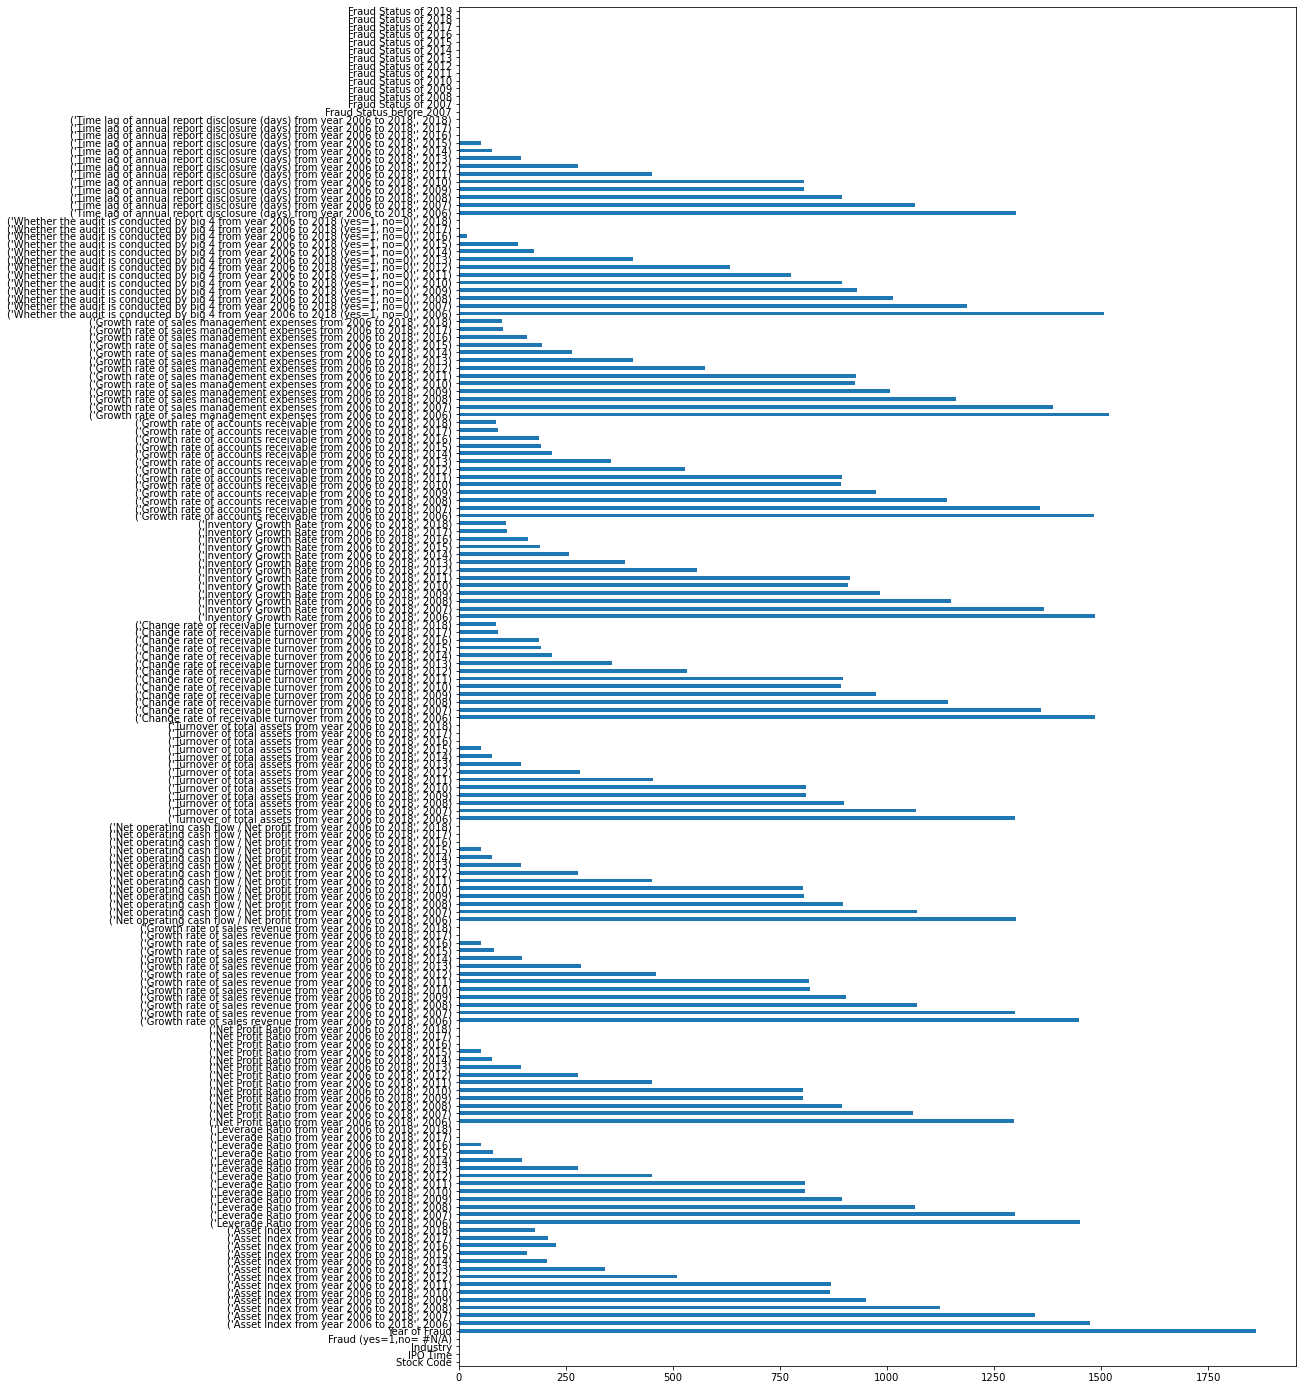

In [295]:
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure()
fig.set_size_inches(15,20)

d = df.isnull().sum(axis=0)

p = d.plot(kind='barh')

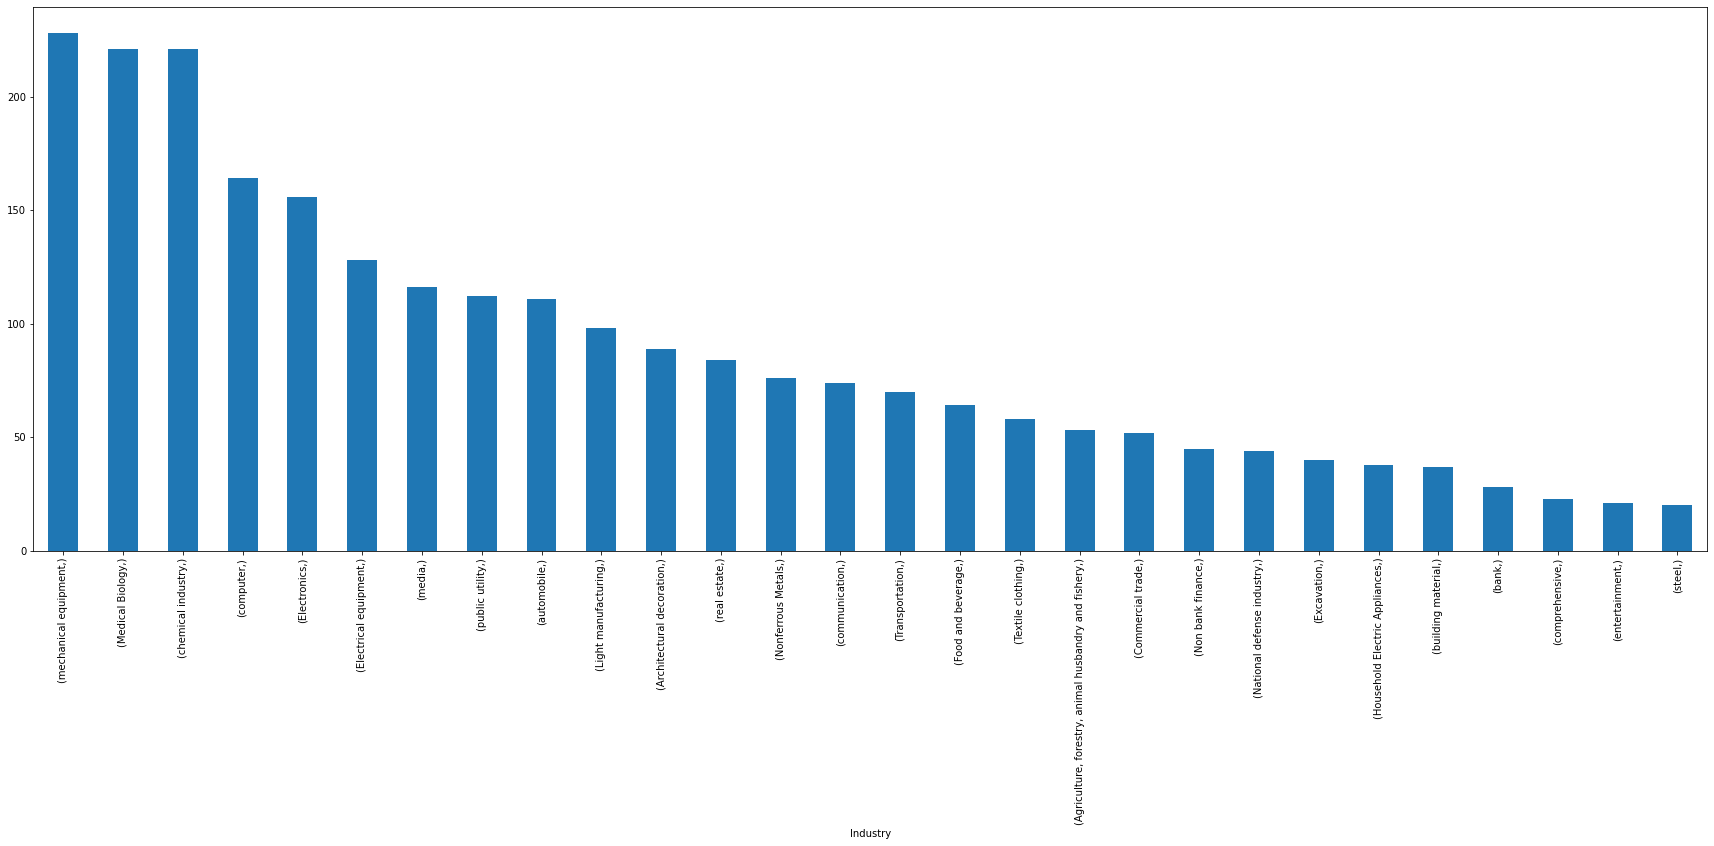

In [304]:
fig = plt.figure()
fig.set_size_inches(30,10)

d = df[['Industry']].value_counts()

p = d.plot(kind='bar')

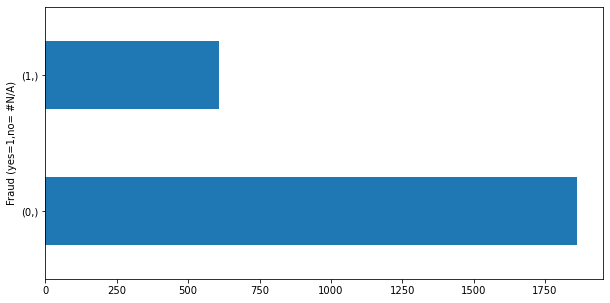

In [306]:
fig = plt.figure()
fig.set_size_inches(10,5)

d = df[['Fraud (yes=1,no= #N/A)']].value_counts()

p = d.plot(kind='barh')

In [310]:
df.describe()

,"Fraud (yes=1,no= #N/A)","('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)","('Asset Index from year 2006 to 2018', 2012)","('Asset Index from year 2006 to 2018', 2013)","('Asset Index from year 2006 to 2018', 2014)","('Asset Index from year 2006 to 2018', 2015)","('Asset Index from year 2006 to 2018', 2016)","('Asset Index from year 2006 to 2018', 2017)","('Asset Index from year 2006 to 2018', 2018)","('Leverage Ratio from year 2006 to 2018', 2006)","('Leverage Ratio from year 2006 to 2018', 2007)","('Leverage Ratio from year 2006 to 2018', 2008)","('Leverage Ratio from year 2006 to 2018', 2009)","('Leverage Ratio from year 2006 to 2018', 2010)","('Leverage Ratio from year 2006 to 2018', 2011)","('Leverage Ratio from year 2006 to 2018', 2012)","('Leverage Ratio from year 2006 to 2018', 2013)","('Leverage Ratio from year 2006 to 2018', 2014)","('Leverage Ratio from year 2006 to 2018', 2015)","('Leverage Ratio from year 2006 to 2018', 2016)","('Leverage Ratio from year 2006 to 2018', 2017)","('Leverage Ratio from year 2006 to 2018', 2018)","('Net Profit Ratio from year 2006 to 2018', 2006)","('Net Profit Ratio from year 2006 to 2018', 2007)","('Net Profit Ratio from year 2006 to 2018', 2008)","('Net Profit Ratio from year 2006 to 2018', 2009)","('Net Profit Ratio from year 2006 to 2018', 2010)","('Net Profit Ratio from year 2006 to 2018', 2011)","('Net Profit Ratio from year 2006 to 2018', 2012)","('Net Profit Ratio from year 2006 to 2018', 2013)","('Net Profit Ratio from year 2006 to 2018', 2014)","('Net Profit Ratio from year 2006 to 2018', 2015)","('Net Profit Ratio from year 2006 to 2018', 2016)","('Net Profit Ratio from year 2006 to 2018', 2017)","('Net Profit Ratio from year 2006 to 2018', 2018)","('Growth rate of sales revenue from year 2006 to 2018', 2006)","('Growth rate of sales revenue from year 2006 to 2018', 2007)","('Growth rate of sales revenue from year 2006 to 2018', 2008)","('Growth rate of sales revenue from year 2006 to 2018', 2009)","('Growth rate of sales revenue from year 2006 to 2018', 2010)","('Growth rate of sales revenue from year 2006 to 2018', 2011)","('Growth rate of sales revenue from year 2006 to 2018', 2012)","('Growth rate of sales revenue from year 2006 to 2018', 2013)","('Growth rate of sales revenue from year 2006 to 2018', 2014)","('Growth rate of sales revenue from year 2006 to 2018', 2015)","('Growth rate of sales revenue from year 2006 to 2018', 2016)","('Growth rate of sales revenue from year 2006 to 2018', 2017)","('Growth rate of sales revenue from year 2006 to 2018', 2018)","('Net operating cash flow / Net profit from year 2006 to 2018', 2006)","('Net operating cash flow / Net profit from year 2006 to 2018', 2007)","('Net operating cash flow / Net profit from year 2006 to 2018', 2008)","('Net operating cash flow / Net profit from year 2006 to 2018', 2009)","('Net operating cash flow / Net profit from year 2006 to 2018', 2010)","('Net operating cash flow / Net profit from year 2006 to 2018', 2011)","('Net operating cash flow / Net profit from year 2006 to 2018', 2012)","('Net operating cash flow / Net profit from year 2006 to 2018', 2013)","('Net operating cash flow / Net profit from year 2006 to 2018', 2014)","('Net operating cash flow / Net profit from year 2006 to 2018', 2015)","('Net operating cash flow / Net profit from year 2006 to 2018', 2016)","('Net operating cash flow / Net profit from year 2006 to 2018', 2017)","('Net operating cash flow / Net profit from year 2006 to 2018', 2018)","('Turnover of total assets from year 2006 to 2018', 2006)","('Turnover of total assets from year 2006 to 2018', 2007)","('Turnover of total assets from year 2006 to 2018', 2008)","('Turnover of total assets from year 2006 to 2018', 2009)","('Turnover of total assets f

### Thus step 2 can be strated.

In [9]:
# resets the option
pd.set_option('display.max_rows', 60)
df

,Stock Code,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)","('Asset Index from year 2006 to 2018', 2012)","('Asset Index from year 2006 to 2018', 2013)","('Asset Index from year 2006 to 2018', 2014)","('Asset Index from year 2006 to 2018', 2015)","('Asset Index from year 2006 to 2018', 2016)","('Asset Index from year 2006 to 2018', 2017)","('Asset Index from year 2006 to 2018', 2018)","('Leverage Ratio from year 2006 to 2018', 2006)","('Leverage Ratio from year 2006 to 2018', 2007)","('Leverage Ratio from year 2006 to 2018', 2008)","('Leverage Ratio from year 2006 to 2018', 2009)","('Leverage Ratio from year 2006 to 2018', 2010)","('Leverage Ratio from year 2006 to 2018', 2011)","('Leverage Ratio from year 2006 to 2018', 2012)","('Leverage Ratio from year 2006 to 2018', 2013)","('Leverage Ratio from year 2006 to 2018', 2014)","('Leverage Ratio from year 2006 to 2018', 2015)","('Leverage Ratio from year 2006 to 2018', 2016)","('Leverage Ratio from year 2006 to 2018', 2017)","('Leverage Ratio from year 2006 to 2018', 2018)","('Net Profit Ratio from year 2006 to 2018', 2006)","('Net Profit Ratio from year 2006 to 2018', 2007)","('Net Profit Ratio from year 2006 to 2018', 2008)","('Net Profit Ratio from year 2006 to 2018', 2009)","('Net Profit Ratio from year 2006 to 2018', 2010)","('Net Profit Ratio from year 2006 to 2018', 2011)","('Net Profit Ratio from year 2006 to 2018', 2012)","('Net Profit Ratio from year 2006 to 2018', 2013)","('Net Profit Ratio from year 2006 to 2018', 2014)","('Net Profit Ratio from year 2006 to 2018', 2015)","('Net Profit Ratio from year 2006 to 2018', 2016)","('Net Profit Ratio from year 2006 to 2018', 2017)","('Net Profit Ratio from year 2006 to 2018', 2018)","('Growth rate of sales revenue from year 2006 to 2018', 2006)","('Growth rate of sales revenue from year 2006 to 2018', 2007)","('Growth rate of sales revenue from year 2006 to 2018', 2008)","('Growth rate of sales revenue from year 2006 to 2018', 2009)","('Growth rate of sales revenue from year 2006 to 2018', 2010)","('Growth rate of sales revenue from year 2006 to 2018', 2011)","('Growth rate of sales revenue from year 2006 to 2018', 2012)","('Growth rate of sales revenue from year 2006 to 2018', 2013)","('Growth rate of sales revenue from year 2006 to 2018', 2014)","('Growth rate of sales revenue from year 2006 to 2018', 2015)","('Growth rate of sales revenue from year 2006 to 2018', 2016)","('Growth rate of sales revenue from year 2006 to 2018', 2017)","('Growth rate of sales revenue from year 2006 to 2018', 2018)","('Net operating cash flow / Net profit from year 2006 to 2018', 2006)","('Net operating cash flow / Net profit from year 2006 to 2018', 2007)","('Net operating cash flow / Net profit from year 2006 to 2018', 2008)","('Net operating cash flow / Net profit from year 2006 to 2018', 2009)","('Net operating cash flow / Net profit from year 2006 to 2018', 2010)","('Net operating cash flow / Net profit from year 2006 to 2018', 2011)","('Net operating cash flow / Net profit from year 2006 to 2018', 2012)","('Net operating cash flow / Net profit from year 2006 to 2018', 2013)","('Net operating cash flow / Net profit from year 2006 to 2018', 2014)","('Net operating cash flow / Net profit from year 2006 to 2018', 2015)","('Net operating cash flow / Net profit from year 2006 to 2018', 2016)","('Net operating cash flow / Net profit from year 2006 to 2018', 2017)","('Net operating cash flow / Net profit from year 2006 to 2018', 2018)","('Turnover of total assets from year 2006 to 2018', 2006)","('Turnover of total assets from year 2006 to 2018', 2007)","('Turnover of total assets from year 2006 to 2018', 2008)","('Turnover of total assets from year 2006 to 

The idea of this step is to, create an empty dataframe firstly, then read and fill it in line by line from the dataframe before.

In [10]:
# empty dataframe creation
columns = [
    'Stock Code',
    'IPO Time',
    'Industry',
    'Year',    # year of the record
    'Has there been any fraud before',    # yes=1, no=0
    'Asset Index',
    'Leverage Ratio',
    'Net Profit Ratio',
    'Growth rate of sales revenue',
    'Net operating cash flow / Net Profit',
    'Turnover of total assets',
    'Change rate of receivable turnover',
    'Inventory Growth Rate',
    'Growth rate of accounts receivable',
    'Growth rate of sales manegement expenses',
    'Whether the audit is conducted by big 4',    # yes=1, no=0
    'Time lag of annual report disclosure (days)',
    # as a prediction model, the correspoding y should be "whether the company has a fraud next that year"
    'Fraud (in next year)'    # yes=1, no=0
]
df_unfold = pd.DataFrame(columns=columns)
df_unfold

,Stock Code,IPO Time,Industry,Year,Has there been any fraud before,Asset Index,Leverage Ratio,Net Profit Ratio,Growth rate of sales revenue,Net operating cash flow / Net Profit,Turnover of total assets,Change rate of receivable turnover,Inventory Growth Rate,Growth rate of accounts receivable,Growth rate of sales manegement expenses,Whether the audit is conducted by big 4,Time lag of annual report disclosure (days),Fraud (in next year)


In [11]:
# (This script block will take minutes)
# Because of the dataframe access principle (by columns), 
# line-by-line addition shows low performance

# Might be improved by another way: seperate tables by year (using drop or filter) then append them to the dataframe before
# But not tried because unfolding was already done

i = 0
for index, row in df.iterrows():
    # row[column_name]
    # iteration by year for each company
    for j in range(2006, 2019):
        record = {}
        record['Stock Code'] = row['Stock Code']
        record['IPO Time'] = row['IPO Time']
        record['Industry'] = row['Industry']
        record['Year'] = j
        
        record['Has there been any fraud before'] = 0
        # 'Has there been any fraud before' check
        if row['Fraud Status before 2007'] == 1:
            record['Has there been any fraud before'] = 1
        for k in range(2006, j):
            if row['Fraud Status of ' + str(k+1)] == 1:
                record['Has there been any fraud before'] = 1
                break
        
        record['Asset Index'] = row["('Asset Index from year 2006 to 2018', " + str(j) + ')']
        record['Leverage Ratio'] = row["('Leverage Ratio from year 2006 to 2018', " + str(j) + ')']
        record['Net Profit Ratio'] = row["('Net Profit Ratio from year 2006 to 2018', " + str(j) + ')']
        record['Growth rate of sales revenue'] = row["('Growth rate of sales revenue from year 2006 to 2018', " + str(j) + ')']
        record['Net operating cash flow / Net Profit'] = row["('Net operating cash flow / Net profit from year 2006 to 2018', " + str(j) + ')']
        record['Turnover of total assets'] = row["('Turnover of total assets from year 2006 to 2018', " + str(j) + ')']
        record['Change rate of receivable turnover'] = row["('Change rate of receivable turnover from 2006 to 2018', " + str(j) + ')']
        record['Inventory Growth Rate'] = row["('Inventory Growth Rate from 2006 to 2018', " + str(j) + ')']
        record['Growth rate of accounts receivable'] = row["('Growth rate of accounts receivable from 2006 to 2018', " + str(j) + ')']
        record['Growth rate of sales manegement expenses'] = row["('Growth rate of sales management expenses from 2006 to 2018', " + str(j) + ')']
        record['Whether the audit is conducted by big 4'] = row["('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', " + str(j) + ')']
        record['Time lag of annual report disclosure (days)'] = row["('Time lag of annual report disclosure (days) from year 2006 to 2018', " + str(j) + ')']
        
        record['Fraud (in next year)'] = row['Fraud Status of ' + str(j+1)]
        
        df_unfold.loc[i] = record

        i += 1

Check of unfolding.

In [12]:
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', None)
display(df)
display(df_unfold.head(20))
display(df_unfold.tail(20))

,Stock Code,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)","('Asset Index from year 2006 to 2018', 2012)","('Asset Index from year 2006 to 2018', 2013)","('Asset Index from year 2006 to 2018', 2014)","('Asset Index from year 2006 to 2018', 2015)","('Asset Index from year 2006 to 2018', 2016)","('Asset Index from year 2006 to 2018', 2017)","('Asset Index from year 2006 to 2018', 2018)","('Leverage Ratio from year 2006 to 2018', 2006)","('Leverage Ratio from year 2006 to 2018', 2007)","('Leverage Ratio from year 2006 to 2018', 2008)","('Leverage Ratio from year 2006 to 2018', 2009)","('Leverage Ratio from year 2006 to 2018', 2010)","('Leverage Ratio from year 2006 to 2018', 2011)","('Leverage Ratio from year 2006 to 2018', 2012)","('Leverage Ratio from year 2006 to 2018', 2013)","('Leverage Ratio from year 2006 to 2018', 2014)","('Leverage Ratio from year 2006 to 2018', 2015)","('Leverage Ratio from year 2006 to 2018', 2016)","('Leverage Ratio from year 2006 to 2018', 2017)","('Leverage Ratio from year 2006 to 2018', 2018)","('Net Profit Ratio from year 2006 to 2018', 2006)","('Net Profit Ratio from year 2006 to 2018', 2007)","('Net Profit Ratio from year 2006 to 2018', 2008)","('Net Profit Ratio from year 2006 to 2018', 2009)","('Net Profit Ratio from year 2006 to 2018', 2010)","('Net Profit Ratio from year 2006 to 2018', 2011)","('Net Profit Ratio from year 2006 to 2018', 2012)","('Net Profit Ratio from year 2006 to 2018', 2013)","('Net Profit Ratio from year 2006 to 2018', 2014)","('Net Profit Ratio from year 2006 to 2018', 2015)","('Net Profit Ratio from year 2006 to 2018', 2016)","('Net Profit Ratio from year 2006 to 2018', 2017)","('Net Profit Ratio from year 2006 to 2018', 2018)","('Growth rate of sales revenue from year 2006 to 2018', 2006)","('Growth rate of sales revenue from year 2006 to 2018', 2007)","('Growth rate of sales revenue from year 2006 to 2018', 2008)","('Growth rate of sales revenue from year 2006 to 2018', 2009)","('Growth rate of sales revenue from year 2006 to 2018', 2010)","('Growth rate of sales revenue from year 2006 to 2018', 2011)","('Growth rate of sales revenue from year 2006 to 2018', 2012)","('Growth rate of sales revenue from year 2006 to 2018', 2013)","('Growth rate of sales revenue from year 2006 to 2018', 2014)","('Growth rate of sales revenue from year 2006 to 2018', 2015)","('Growth rate of sales revenue from year 2006 to 2018', 2016)","('Growth rate of sales revenue from year 2006 to 2018', 2017)","('Growth rate of sales revenue from year 2006 to 2018', 2018)","('Net operating cash flow / Net profit from year 2006 to 2018', 2006)","('Net operating cash flow / Net profit from year 2006 to 2018', 2007)","('Net operating cash flow / Net profit from year 2006 to 2018', 2008)","('Net operating cash flow / Net profit from year 2006 to 2018', 2009)","('Net operating cash flow / Net profit from year 2006 to 2018', 2010)","('Net operating cash flow / Net profit from year 2006 to 2018', 2011)","('Net operating cash flow / Net profit from year 2006 to 2018', 2012)","('Net operating cash flow / Net profit from year 2006 to 2018', 2013)","('Net operating cash flow / Net profit from year 2006 to 2018', 2014)","('Net operating cash flow / Net profit from year 2006 to 2018', 2015)","('Net operating cash flow / Net profit from year 2006 to 2018', 2016)","('Net operating cash flow / Net profit from year 2006 to 2018', 2017)","('Net operating cash flow / Net profit from year 2006 to 2018', 2018)","('Turnover of total assets from year 2006 to 2018', 2006)","('Turnover of total assets from year 2006 to 2018', 2007)","('Turnover of total assets from year 2006 to 2018', 2008)","('Turnover of total assets from year 2006 to 

,Stock Code,IPO Time,Industry,Year,Has there been any fraud before,Asset Index,Leverage Ratio,Net Profit Ratio,Growth rate of sales revenue,Net operating cash flow / Net Profit,Turnover of total assets,Change rate of receivable turnover,Inventory Growth Rate,Growth rate of accounts receivable,Growth rate of sales manegement expenses,Whether the audit is conducted by big 4,Time lag of annual report disclosure (days),Fraud (in next year)
0,600760.SH,1996-10-11,National defense industry,2006,0,1.443241,1.225674,0.994036,1.104885,0.260102,0.7580,2.119460,0.830765,2.341759,2.336396,0.0,118.0,0
1,600760.SH,1996-10-11,National defense industry,2007,0,1.283185,1.041245,2.095662,1.192122,0.252097,0.8438,6.412977,1.022576,7.645054,0.503270,0.0,58.0,0
2,600760.SH,1996-10-11,National defense industry,2008,0,0.408836,1.085662,0.996473,1.154143,1.863665,0.9152,1.035259,1.256140,1.194837,1.224209,0.0,99.0,0
3,600760.SH,1996-10-11,National defense industry,2009,0,0.727867,1.157428,1.143559,1.788433,2.973931,1.3883,0.107780,1.207140,0.192757,0.869574,0.0,26.0,0
4,600760.SH,1996-10-11,National defense industry,2010,0,1.942889,1.052007,0.780445,2.153732,-0.005583,1.4058,24.672828,2.886563,53.138665,0.517143,0.0,120.0,0
5,600760.SH,1996-10-11,National defense industry,2011,0,0.872573,1.152621,0.899762,1.198286,1.549409,1.0969,0.767182,0.906669,0.919304,1.498032,0.0,112.0,0
6,600760.SH,1996-10-11,National defense industry,2012,0,1.183997,0.986965,0.334218,0.811912,-5.011016,0.8855,2.424336,0.765423,1.968349,1.053941,0.0,89.0,0
7,600760.SH,1996-10-11,National defense industry,2013,0,0.900469,1.015983,-0.267436,1.061399,1.699412,0.9370,1.484243,1.009511,1.575373,1.029116,0.0,60.0,0
8,600760.SH,1996-10-11,National defense industry,2014,0,0.775429,1.034643,1.000650,0.791678,-0.384168,0.7605,0.744100,1.047173,0.589087,1.263815,0.0,119.0,0
9,600760.SH,1996-10-11,National defense industry,2015,0,0.994942,1.070379,0.915152,0.672435,-0.297037,0.6014,0.830229,0.729496,0.558275,1.379940,0.0,117.0,0


,Stock Code,IPO Time,Industry,Year,Has there been any fraud before,Asset Index,Leverage Ratio,Net Profit Ratio,Growth rate of sales revenue,Net operating cash flow / Net Profit,Turnover of total assets,Change rate of receivable turnover,Inventory Growth Rate,Growth rate of accounts receivable,Growth rate of sales manegement expenses,Whether the audit is conducted by big 4,Time lag of annual report disclosure (days),Fraud (in next year)
32103,000793.SZ,1997-07-29,media,2012,0,1.193375,1.131153,0.822842,1.079477,0.348463,0.7258,1.157904,1.268605,1.249932,0.991956,0.0,36.0,0
32104,000793.SZ,1997-07-29,media,2013,0,1.045825,0.977134,0.951460,0.915549,1.031681,0.5663,1.439037,0.623862,1.317509,1.199786,0.0,74.0,0
32105,000793.SZ,1997-07-29,media,2014,0,1.160850,0.938953,0.846342,1.054218,0.761199,0.4389,1.896038,2.085233,1.998837,0.991175,0.0,84.0,1
32106,000793.SZ,1997-07-29,media,2015,1,0.873531,0.798510,1.023448,1.096815,0.917312,0.3666,1.147267,0.749684,1.258340,1.025191,0.0,86.0,1
32107,000793.SZ,1997-07-29,media,2016,1,1.030684,0.969217,0.861537,1.054406,0.653944,0.3487,1.248729,0.855816,1.316667,1.006581,0.0,105.0,1
32108,000793.SZ,1997-07-29,media,2017,1,1.236016,1.415600,0.747296,0.748315,1.556448,0.2340,0.867121,2.002968,0.648880,1.018974,0.0,118.0,1
32109,000793.SZ,1997-07-29,media,2018,1,1.056791,1.598994,1.011299,1.106376,0.073247,0.2634,1.878827,0.939408,2.078690,0.867221,0.0,117.0,0
32110,600260.SH,2000-07-06,communication,2006,0,1.121873,0.783835,0.689513,1.720817,0.165646,0.5607,0.375733,1.383102,0.646567,1.607150,0.0,108.0,0
32111,600260.SH,2000-07-06,communication,2007,0,3.607488,1.326771,0.710534,1.305388,-0.186838,0.5780,0.507000,1.071562,0.661832,0.709786,0.0,82.0,0
32112,600260.SH,2000-07-06,communication,2008,0,0.511595,1.220462,0.786252,1.013263,-4.461378,0.4835,1.793768,1.814029,1.817559,1.650400,0.0,117.0,0


In [13]:
df_unfold.dtypes

Stock Code                                      object
IPO Time                                        object
Industry                                        object
Year                                            object
Has there been any fraud before                 object
Asset Index                                    float64
Leverage Ratio                                 float64
Net Profit Ratio                               float64
Growth rate of sales revenue                   float64
Net operating cash flow / Net Profit           float64
Turnover of total assets                       float64
Change rate of receivable turnover             float64
Inventory Growth Rate                          float64
Growth rate of accounts receivable             float64
Growth rate of sales manegement expenses       float64
Whether the audit is conducted by big 4        float64
Time lag of annual report disclosure (days)    float64
Fraud (in next year)                            object
dtype: obj

***IPO Time***, ***Year***, ***Has there been any fraud before***, ***Fraud*** show *object* type, which should be *int* or *datetime*. So their types should be transferred.

In [14]:
df_unfold['Year'] = df_unfold['Year'].astype(int)
df_unfold['Has there been any fraud before'] = df_unfold['Has there been any fraud before'].astype(int)
df_unfold['Fraud (in next year)'] = df_unfold['Fraud (in next year)'].astype(int)
df_unfold['IPO Time'] = pd.to_datetime(df_unfold['IPO Time'])
df_unfold.dtypes

Stock Code                                             object
IPO Time                                       datetime64[ns]
Industry                                               object
Year                                                    int64
Has there been any fraud before                         int64
Asset Index                                           float64
Leverage Ratio                                        float64
Net Profit Ratio                                      float64
Growth rate of sales revenue                          float64
Net operating cash flow / Net Profit                  float64
Turnover of total assets                              float64
Change rate of receivable turnover                    float64
Inventory Growth Rate                                 float64
Growth rate of accounts receivable                    float64
Growth rate of sales manegement expenses              float64
Whether the audit is conducted by big 4               float64
Time lag

The data is successfully unfolded. 
### Next is step 3: deal with null (Nan, ...) data (delete or fill)

First of all, visualise the missing data.

In [15]:
!pip install missingno

In [15]:
print(df_unfold.isnull().sum(axis=0))

Stock Code                                        0
IPO Time                                          0
Industry                                          0
Year                                              0
Has there been any fraud before                   0
Asset Index                                    8454
Leverage Ratio                                 7337
Net Profit Ratio                               5858
Growth rate of sales revenue                   7384
Net operating cash flow / Net Profit           5880
Turnover of total assets                       5902
Change rate of receivable turnover             8416
Inventory Growth Rate                          8582
Growth rate of accounts receivable             8401
Growth rate of sales manegement expenses       8730
Whether the audit is conducted by big 4        7675
Time lag of annual report disclosure (days)    5873
Fraud (in next year)                              0
dtype: int64


<AxesSubplot:>

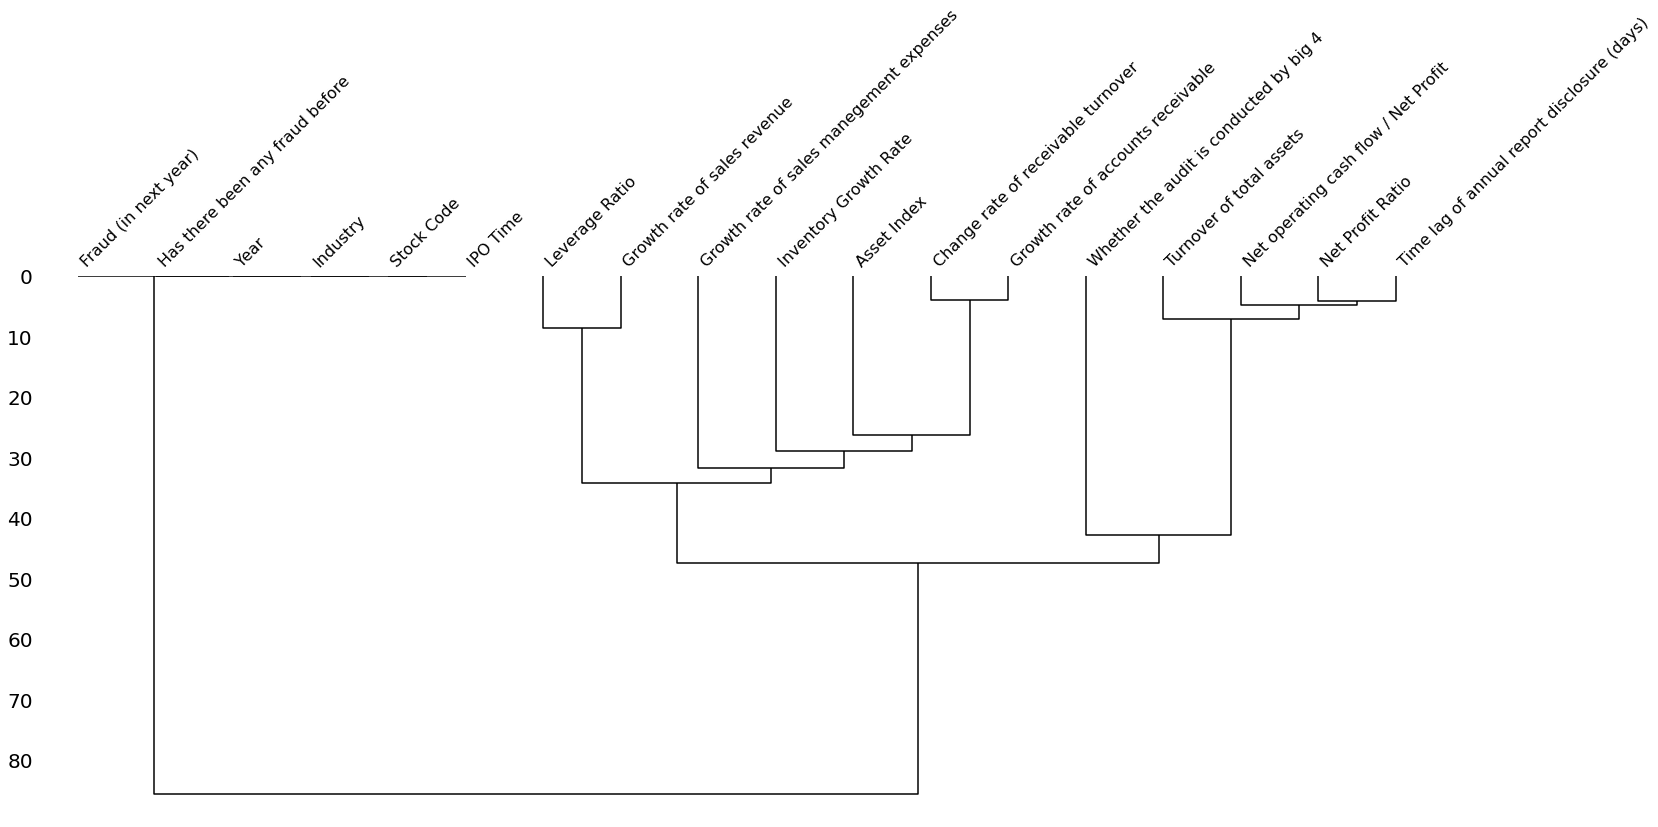

In [16]:
import missingno as msno
msno.dendrogram(df_unfold)

The dendrogram implies MAR. Moreover, there are both qualitative and quantitative missing data. The columns with the most missing data accout for 27.18%, so the only qualitative column will be handled by mode, while quantitative data will try both KNN and mean.

In [17]:
# backup the dataset with nans
df_origin = df_unfold.copy()

from sklearn.impute import SimpleImputer, KNNImputer

imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_knn = KNNImputer(n_neighbors=3, weights="uniform")

whether_audit = df_unfold['Whether the audit is conducted by big 4'].values.reshape(-1, 1)
imp_mode = imp_mode.fit_transform(whether_audit)
df_unfold['Whether the audit is conducted by big 4'] = imp_mode
df_unfold['Whether the audit is conducted by big 4'].describe()

count    32123.000000
mean         0.052143
std          0.222319
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Whether the audit is conducted by big 4, dtype: float64

In [18]:
print(df_unfold.isnull().sum(axis=0))

Stock Code                                        0
IPO Time                                          0
Industry                                          0
Year                                              0
Has there been any fraud before                   0
Asset Index                                    8454
Leverage Ratio                                 7337
Net Profit Ratio                               5858
Growth rate of sales revenue                   7384
Net operating cash flow / Net Profit           5880
Turnover of total assets                       5902
Change rate of receivable turnover             8416
Inventory Growth Rate                          8582
Growth rate of accounts receivable             8401
Growth rate of sales manegement expenses       8730
Whether the audit is conducted by big 4           0
Time lag of annual report disclosure (days)    5873
Fraud (in next year)                              0
dtype: int64


In [20]:
df_unfold_mean = df_unfold.copy()
df_unfold_knn = df_unfold.copy()

df_unfold_mean[df_unfold.columns[5:17]] = imp_mean.fit_transform(df_unfold_mean[df_unfold.columns[5:17]])
df_unfold_knn[df_unfold.columns[5:17]] = imp_knn.fit_transform(df_unfold_knn[df_unfold.columns[5:17]])

In [21]:
print(df_unfold_knn.isnull().sum(axis=0))
print(df_unfold_mean.isnull().sum(axis=0))
display(df_unfold_knn.describe())
display(df_unfold_mean.describe())

Stock Code                                     0
IPO Time                                       0
Industry                                       0
Year                                           0
Has there been any fraud before                0
Asset Index                                    0
Leverage Ratio                                 0
Net Profit Ratio                               0
Growth rate of sales revenue                   0
Net operating cash flow / Net Profit           0
Turnover of total assets                       0
Change rate of receivable turnover             0
Inventory Growth Rate                          0
Growth rate of accounts receivable             0
Growth rate of sales manegement expenses       0
Whether the audit is conducted by big 4        0
Time lag of annual report disclosure (days)    0
Fraud (in next year)                           0
dtype: int64
Stock Code                                     0
IPO Time                                       0
Industr

,Year,Has there been any fraud before,Asset Index,Leverage Ratio,Net Profit Ratio,Growth rate of sales revenue,Net operating cash flow / Net Profit,Turnover of total assets,Change rate of receivable turnover,Inventory Growth Rate,Growth rate of accounts receivable,Growth rate of sales manegement expenses,Whether the audit is conducted by big 4,Time lag of annual report disclosure (days),Fraud (in next year)
count,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000
mean,2012.000000,0.115587,5.022791,1.058110,0.942121,6.254903,1.618568,0.781648,3.459666,5.713818,20.492911,1.170585,0.052143,207.909079,0.033029
std,3.741716,0.319734,597.814120,0.982343,30.142537,756.027395,60.869484,0.566150,142.460112,355.985609,1770.873047,10.345089,0.222319,271.720448,0.178716
min,2006.000000,0.000000,-7.334303,-2.589993,-4997.206588,-0.033332,-931.740026,-0.013400,-4.393278,0.000090,0.000122,-9.310747,0.000000,10.000000,0.000000
25%,2009.000000,0.000000,0.898304,0.925509,0.818687,1.045049,0.368886,0.448550,0.898001,1.006286,1.020371,0.890169,0.000000,89.000000,0.000000
50%,2012.000000,0.000000,1.045087,1.033789,0.914324,1.150383,0.791955,0.762900,1.111606,1.062859,1.275566,1.033001,0.000000,99.000000,0.000000
75%,2015.000000,0.000000,1.236337,1.117527,1.265146,1.287705,1.468003,0.882300,1.760535,1.303330,2.123611,1.341815,0.000000,117.000000,0.000000
max,2018.000000,1.000000,107030.536655,136.990190,1598.928095,134608.058410,10508.188224,12.110000,19046.401683,49803.485017,259791.599606,1842.419433,1.000000,2508.000000,1.000000


,Year,Has there been any fraud before,Asset Index,Leverage Ratio,Net Profit Ratio,Growth rate of sales revenue,Net operating cash flow / Net Profit,Turnover of total assets,Change rate of receivable turnover,Inventory Growth Rate,Growth rate of accounts receivable,Growth rate of sales manegement expenses,Whether the audit is conducted by big 4,Time lag of annual report disclosure (days),Fraud (in next year)
count,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000,32123.000000
mean,2012.000000,0.115587,6.372329,1.047204,0.848546,7.766066,1.802023,0.769487,3.474864,7.033727,22.823614,1.154566,0.052143,233.711771,0.033029
std,3.741716,0.319734,597.805592,0.981501,30.141885,756.022331,60.868183,0.565178,137.980061,355.629773,1703.639500,10.343997,0.222319,266.039419,0.178716
min,2006.000000,0.000000,-7.334303,-2.589993,-4997.206588,-0.033332,-931.740026,-0.013400,-4.393278,0.000090,0.000122,-9.310747,0.000000,10.000000,0.000000
25%,2009.000000,0.000000,0.914884,0.931936,0.818687,1.047857,0.369489,0.449700,0.914897,1.019984,1.033771,0.934689,0.000000,89.000000,0.000000
50%,2012.000000,0.000000,1.200805,1.047204,0.850817,1.228106,1.195991,0.764700,1.168736,1.282935,1.337912,1.085472,0.000000,115.000000,0.000000
75%,2015.000000,0.000000,6.372329,1.062218,0.954219,2.366986,1.802023,0.882150,3.474864,7.033727,22.823614,1.154566,0.000000,233.711771,0.000000
max,2018.000000,1.000000,107030.536655,136.990190,1598.928095,134608.058410,10508.188224,12.110000,19046.401683,49803.485017,259791.599606,1842.419433,1.000000,2508.000000,1.000000


Because the feature ***Industry*** is of string and ***IPO Time*** is of datetime, they should be pre-processed.

In [22]:
import datetime

df_unfold_knn['IPO Time'] = df_unfold_knn['IPO Time'].dt.year
df_unfold_mean['IPO Time'] = df_unfold_mean['IPO Time'].dt.year

In [23]:
from category_encoders.one_hot import OneHotEncoder

ohe=OneHotEncoder()
df_unfold_mean = pd.concat([ohe.fit_transform(df_unfold_mean['Industry']), df_unfold_mean], axis=1)
df_unfold_knn = pd.concat([ohe.fit_transform(df_unfold_knn['Industry']), df_unfold_knn], axis=1)

Then ***Industry*** can be deleted..

In [24]:
df_unfold_mean.drop('Industry', 1, inplace=True)
df_unfold_knn.drop('Industry', 1, inplace=True)

In [25]:
df_unfold_mean.drop('Stock Code', 1, inplace=True)
df_unfold_knn.drop('Stock Code', 1, inplace=True)

In [26]:
df_unfold_mean['Fraud (in next year)'].describe()

count    32123.000000
mean         0.033029
std          0.178716
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Fraud (in next year), dtype: float64

As shown, there are only 3.3% of y=1 samples.. 
### So now let's begin to balance the data

In [26]:
!pip install imblearn

First of all, split the train, valid and test.

Idea: 2017, 2018 as test; 2006-2016 as train + valid.

In [27]:
from sklearn.model_selection import train_test_split

df_mean_test = df_unfold_mean[df_unfold_mean['Year'].isin(['2017', '2018'])]
df_knn_test = df_unfold_knn[df_unfold_knn['Year'].isin(['2017', '2018'])]
df_mean_test.drop('Year', 1, inplace=True)
df_knn_test.drop('Year', 1, inplace=True)
X_mean_test = df_mean_test.drop('Fraud (in next year)', 1)
X_knn_test = df_knn_test.drop('Fraud (in next year)', 1)
y_mean_test = df_mean_test[['Fraud (in next year)']]
y_knn_test = df_knn_test[['Fraud (in next year)']]

df_mean_tv = df_unfold_mean[~df_unfold_mean['Year'].isin(['2017', '2018'])]
df_knn_tv = df_unfold_knn[~df_unfold_knn['Year'].isin(['2017', '2018'])]
df_mean_tv.drop('Year', 1, inplace=True)
df_knn_tv.drop('Year', 1, inplace=True)
X_mean_tv = df_mean_tv.drop('Fraud (in next year)', 1)
X_knn_tv = df_knn_tv.drop('Fraud (in next year)', 1)
y_mean_tv = df_mean_tv[['Fraud (in next year)']]
y_knn_tv = df_knn_tv[['Fraud (in next year)']]

X_mean_train, X_mean_valid, y_mean_train, y_mean_valid = train_test_split(X_mean_tv, y_mean_tv, test_size=0.182, random_state=42)
X_knn_train, X_knn_valid, y_knn_train, y_knn_valid = train_test_split(X_knn_tv, y_knn_tv, test_size=0.182, random_state=42)

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
y_mean_train.value_counts().to_dict()

{(0,): 21506, (1,): 728}

In [29]:
from imblearn.combine import SMOTETomek

os = SMOTETomek(1, random_state=42)
X_mean_train, y_mean_train = os.fit_resample(X_mean_train, y_mean_train)
X_knn_train, y_knn_train = os.fit_resample(X_knn_train, y_knn_train)
y_mean_train.value_counts().to_dict()

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


{(1,): 21443, (0,): 21443}

### Next is feature selection

In [30]:
# A tool function copied from lab session
def print_variable_importances( feature_names, dict_in, show_top = 10 ):
  """
  Prints a table of feature importance scores.
  
  Keyword arguments
  feature_names -- list of feature names. Must have the same ordering as the 
                   scores in each instance of list_of_scores (see below)
  dict_in       -- dictionary of the form {method_name:list_of_scores} where:
                   method_name    -- string
                   list_of_scores -- list of scores, ordered in the same order
                                     as the passed feature_names
  show_top      -- number of features to show (default 10, None to print all)
  """


  # Implement the definition of None for show_top
  if show_top is None:
    show_top = len(feature_names)
  
  # Set up lists to hold the titles and score_feature tuples
  # We need a list so that they maintain fixed order as we 
  # iterate over them row-by-row.
  to_print_titles = []
  to_print_scores = []
  
  # Pair each list of scores with a copy of the feature names and sort
  # based on the variable importance score descending
  for k, v in dict_in.items():
    # zip pairs, sorted sorts, reverse orders descending
    feature_names_plus_scores = sorted( zip(v, feature_names) )
    feature_names_plus_scores.reverse()
    to_print_titles.append(k)
    to_print_scores.append(feature_names_plus_scores)
    
    
  # Print the scores
  
  # Create a list of strings to print in each header cell
  line_parts = []
  for j in range(len(to_print_titles)):
    line_parts.append('{:<38}'.format(to_print_titles[j]))
  
  # Print each header cell using a separator ' | ', adding the fixed rank column header 
  print('Rank | ' + ' | '.join( ['{:<38}'.format(x) for x in to_print_titles] ) )
  
  # Print the header underline
  print('---- + ' + ' + '.join( [ '-'*38 ]*len(to_print_titles) ) )
  
  # Print each line
  for i in range(show_top):
    # Create a list of strings to print for each row cell
    line_parts = []
    for j in range(len(to_print_titles)):
      line_parts.append(  '{:<30}: {:.4f}'.format(to_print_scores[j][i][1], to_print_scores[j][i][0]) )
    # Print the row by:
    # (1) joining each row cell using a separator ' | '
    # (2) adding the fixed rank column header 
    print( '{:<4} | '.format(str(i)) + ' | '.join(line_parts) )

Here we use RFE with random forest. As a greedy algorithm, it selects the best features by recursive. This will strenthen the use of features.

In [31]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

selector = RFE(RandomForestClassifier(), n_features_to_select=10)
selector.fit(X_mean_train, y_mean_train)

method_name = 'RFE RF '
feature_importance_scores = {}
feature_importance_scores[method_name] = selector.estimator_.feature_importances_

print_variable_importances(X_mean_train.columns[selector.support_], feature_importance_scores)

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:2

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:2

Rank | RFE RF                                
---- + --------------------------------------
0    | Time lag of annual report disclosure (days): 0.1967
1    | IPO Time                      : 0.1490
2    | Inventory Growth Rate         : 0.1040
3    | Asset Index                   : 0.0863
4    | Growth rate of accounts receivable: 0.0858
5    | Growth rate of sales revenue  : 0.0856
6    | Turnover of total assets      : 0.0764
7    | Net operating cash flow / Net Profit: 0.0747
8    | Net Profit Ratio              : 0.0718
9    | Leverage Ratio                : 0.0698


So these features will be selected for dataset with mean imputer.

In [32]:
columns = ['Time lag of annual report disclosure (days)', 'IPO Time', 'Inventory Growth Rate', 'Asset Index',
          'Growth rate of accounts receivable', 'Growth rate of sales revenue', 'Net operating cash flow / Net Profit',
          'Turnover of total assets', 'Net Profit Ratio', 'Leverage Ratio']

X_mean_train = X_mean_train[columns]
X_mean_valid = X_mean_valid[columns]
X_mean_test = X_mean_test[columns]

The dataset with knn imputer should handled as well.

In [102]:
selector = RFE(RandomForestClassifier(), n_features_to_select=10)
selector.fit(X_knn_train, y_knn_train)

method_name = 'RFE RF '
feature_importance_scores = {}
feature_importance_scores[method_name] = selector.estimator_.feature_importances_

print_variable_importances(X_knn_train.columns[selector.support_], feature_importance_scores)

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:2

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:2

Rank | RFE RF                                
---- + --------------------------------------
0    | Time lag of annual report disclosure (days): 0.1818
1    | IPO Time                      : 0.1578
2    | Change rate of receivable turnover: 0.0964
3    | Growth rate of accounts receivable: 0.0953
4    | Turnover of total assets      : 0.0899
5    | Net Profit Ratio              : 0.0798
6    | Net operating cash flow / Net Profit: 0.0788
7    | Growth rate of sales manegement expenses: 0.0785
8    | Leverage Ratio                : 0.0722
9    | Inventory Growth Rate         : 0.0696


In [33]:
columns = ['Time lag of annual report disclosure (days)', 'IPO Time', 'Change rate of receivable turnover', 
          'Growth rate of accounts receivable', 'Turnover of total assets', 'Net Profit Ratio', 
          'Net operating cash flow / Net Profit', 'Growth rate of sales manegement expenses', 
          'Leverage Ratio', 'Inventory Growth Rate']

X_knn_train = X_knn_train[columns]
X_knn_valid = X_knn_valid[columns]
X_knn_test = X_knn_test[columns]

From now on, data cleaning is complete.

## 2. Model Training

### 2.1Neural Networks

In [108]:
!pip install tensorflow-hub 
!pip install tensorflow
!pip install keras

     |████████████████████████████████| 108 kB 791 kB/s eta 0:00:01
     |████████████████████████████████| 962 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 217.4 MB 15 kB/s  eta 0:00:016
     |████████████████████████████████| 1.6 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 677 kB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached numpy-1.22.3-cp38-cp38-macosx_10_14_x86_64.whl (17.6 MB)
     |████████████████████████████████| 5.8 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 6.9 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 1.4 MB 6.4 MB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     |███████████

In [208]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

from numpy.random import seed
np.random.seed(1)

from tensorflow import random
random.set_seed(2)

import random as rn
rn.seed(1234)

Here is the model after adjusting parameters for mean dataset.

In [217]:
model_mean = Sequential([
    Dense(5, input_shape = [10], activation="relu"),
    Dense(20, activation="relu"),
    Dense(10, activation="softmax")
])
model_mean.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 5)                 55        
                                                                 
 dense_67 (Dense)            (None, 20)                120       
                                                                 
 dense_68 (Dense)            (None, 10)                210       
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
429/429 [==============================] - 1s 996us/step - loss: 1.4188 - sparse_categorical_accuracy: 0.5784 - val_loss: 0.8468 - val_sparse_categorical_accuracy: 0.5288
Epoch 2/200
429/429 [==============================] - 0s 880us/step - loss: 0.6718 - sparse_categorical_accuracy: 0.6905 - val_loss: 0.7766 - val_sparse_categorical_accuracy: 0.4833
Epoch 3/200
429/429 [==============================] - 0s 741us/step - loss: 0.6012 - sparse_categorical_accuracy: 0.6988 - val_loss: 0.7760 - val_sparse_categorical_accuracy: 0.4631
Epoch 4/200
429/429 [==============================] - 0s 744us/step - loss: 0.5838 - sparse_categorical_accuracy: 0.7018 - val_loss: 0.7890 - val_sparse_categorical_accuracy: 0.4492
Epoch 5/200
429/429 [==============================] - 0s 769us/step - loss: 0.5749 - sparse_categorical_accuracy: 0.7045 - val_loss: 0.7751 - val_sparse_categorical_accuracy: 0.4461
Epoch 6/200
429/429 [==============================] - 0s 788us/step - loss: 0.5690 -

429/429 [==============================] - 0s 925us/step - loss: 0.5252 - sparse_categorical_accuracy: 0.7248 - val_loss: 0.7408 - val_sparse_categorical_accuracy: 0.4316
Epoch 90/200
429/429 [==============================] - 0s 903us/step - loss: 0.5250 - sparse_categorical_accuracy: 0.7251 - val_loss: 0.7520 - val_sparse_categorical_accuracy: 0.4289
Epoch 91/200
429/429 [==============================] - 0s 891us/step - loss: 0.5247 - sparse_categorical_accuracy: 0.7251 - val_loss: 0.7388 - val_sparse_categorical_accuracy: 0.4352
Epoch 92/200
429/429 [==============================] - 0s 887us/step - loss: 0.5247 - sparse_categorical_accuracy: 0.7252 - val_loss: 0.7662 - val_sparse_categorical_accuracy: 0.4279
Epoch 93/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5244 - sparse_categorical_accuracy: 0.7258 - val_loss: 0.7730 - val_sparse_categorical_accuracy: 0.4245
Epoch 94/200
429/429 [==============================] - 0s 992us/step - loss: 0.5242 - sparse_c

Epoch 134/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5184 - sparse_categorical_accuracy: 0.7276 - val_loss: 0.7931 - val_sparse_categorical_accuracy: 0.4196
Epoch 135/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5183 - sparse_categorical_accuracy: 0.7274 - val_loss: 0.7643 - val_sparse_categorical_accuracy: 0.4302
Epoch 136/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5183 - sparse_categorical_accuracy: 0.7283 - val_loss: 0.7642 - val_sparse_categorical_accuracy: 0.4287
Epoch 137/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5183 - sparse_categorical_accuracy: 0.7281 - val_loss: 0.7521 - val_sparse_categorical_accuracy: 0.4607
Epoch 138/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5180 - sparse_categorical_accuracy: 0.7289 - val_loss: 0.7487 - val_sparse_categorical_accuracy: 0.4362
Epoch 139/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5179 -

Epoch 179/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5148 - sparse_categorical_accuracy: 0.7288 - val_loss: 0.7739 - val_sparse_categorical_accuracy: 0.4324
Epoch 180/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5148 - sparse_categorical_accuracy: 0.7287 - val_loss: 0.8056 - val_sparse_categorical_accuracy: 0.4239
Epoch 181/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5148 - sparse_categorical_accuracy: 0.7291 - val_loss: 0.7807 - val_sparse_categorical_accuracy: 0.4306
Epoch 182/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5147 - sparse_categorical_accuracy: 0.7287 - val_loss: 0.7656 - val_sparse_categorical_accuracy: 0.4342
Epoch 183/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5146 - sparse_categorical_accuracy: 0.7283 - val_loss: 0.7896 - val_sparse_categorical_accuracy: 0.4298
Epoch 184/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5146 -

(0.0, 1.0)

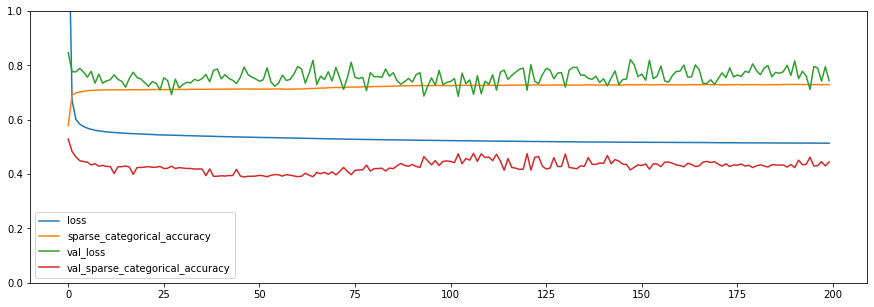

In [218]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

model_mean.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd" , #stochastic gradient descent
            metrics=["sparse_categorical_accuracy"])

history = model_mean.fit(pd.DataFrame(StandardScaler().fit_transform(X_mean_train), columns=X_mean_train.columns), y_mean_train, epochs=200,
         validation_data=(pd.DataFrame(StandardScaler().fit_transform(X_mean_valid), columns=X_mean_valid.columns), y_mean_valid),batch_size = 100)

pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.gca().set_ylim(0, 1)

The final accuracy is around 0.73.

Do same with knn dateset again.

In [219]:
model_knn = Sequential([
    Dense(4, input_shape = [10], activation="relu"),
    Dense(18, activation="relu"),
    Dense(10, activation="softmax")
])
model_knn.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 4)                 44        
                                                                 
 dense_70 (Dense)            (None, 18)                90        
                                                                 
 dense_71 (Dense)            (None, 10)                190       
                                                                 
Total params: 324
Trainable params: 324
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
429/429 [==============================] - 1s 994us/step - loss: 1.2314 - sparse_categorical_accuracy: 0.5786 - val_loss: 0.7603 - val_sparse_categorical_accuracy: 0.4999
Epoch 2/200
429/429 [==============================] - 0s 849us/step - loss: 0.6339 - sparse_categorical_accuracy: 0.6525 - val_loss: 0.7284 - val_sparse_categorical_accuracy: 0.4864
Epoch 3/200
429/429 [==============================] - 0s 771us/step - loss: 0.5992 - sparse_categorical_accuracy: 0.6686 - val_loss: 0.7342 - val_sparse_categorical_accuracy: 0.4653
Epoch 4/200
429/429 [==============================] - 0s 747us/step - loss: 0.5860 - sparse_categorical_accuracy: 0.6877 - val_loss: 0.7173 - val_sparse_categorical_accuracy: 0.4532
Epoch 5/200
429/429 [==============================] - 0s 742us/step - loss: 0.5777 - sparse_categorical_accuracy: 0.6947 - val_loss: 0.7238 - val_sparse_categorical_accuracy: 0.4461
Epoch 6/200
429/429 [==============================] - 0s 726us/step - loss: 0.5716 -

429/429 [==============================] - 0s 955us/step - loss: 0.5282 - sparse_categorical_accuracy: 0.7172 - val_loss: 0.6883 - val_sparse_categorical_accuracy: 0.4977
Epoch 90/200
429/429 [==============================] - 0s 887us/step - loss: 0.5281 - sparse_categorical_accuracy: 0.7162 - val_loss: 0.7091 - val_sparse_categorical_accuracy: 0.4912
Epoch 91/200
429/429 [==============================] - 0s 908us/step - loss: 0.5280 - sparse_categorical_accuracy: 0.7159 - val_loss: 0.6794 - val_sparse_categorical_accuracy: 0.5019
Epoch 92/200
429/429 [==============================] - 0s 902us/step - loss: 0.5279 - sparse_categorical_accuracy: 0.7159 - val_loss: 0.6811 - val_sparse_categorical_accuracy: 0.5023
Epoch 93/200
429/429 [==============================] - 0s 911us/step - loss: 0.5279 - sparse_categorical_accuracy: 0.7168 - val_loss: 0.6909 - val_sparse_categorical_accuracy: 0.4989
Epoch 94/200
429/429 [==============================] - 0s 918us/step - loss: 0.5277 - sparse

Epoch 134/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5245 - sparse_categorical_accuracy: 0.7202 - val_loss: 0.6760 - val_sparse_categorical_accuracy: 0.5159
Epoch 135/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5243 - sparse_categorical_accuracy: 0.7199 - val_loss: 0.6436 - val_sparse_categorical_accuracy: 0.5266
Epoch 136/200
429/429 [==============================] - 0s 1ms/step - loss: 0.5243 - sparse_categorical_accuracy: 0.7202 - val_loss: 0.6259 - val_sparse_categorical_accuracy: 0.5345
Epoch 137/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5241 - sparse_categorical_accuracy: 0.7200 - val_loss: 0.6792 - val_sparse_categorical_accuracy: 0.5151
Epoch 138/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5242 - sparse_categorical_accuracy: 0.7203 - val_loss: 0.6750 - val_sparse_categorical_accuracy: 0.5161
Epoch 139/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5242 -

Epoch 179/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5209 - sparse_categorical_accuracy: 0.7224 - val_loss: 0.6944 - val_sparse_categorical_accuracy: 0.5124
Epoch 180/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5210 - sparse_categorical_accuracy: 0.7226 - val_loss: 0.6600 - val_sparse_categorical_accuracy: 0.5290
Epoch 181/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5208 - sparse_categorical_accuracy: 0.7224 - val_loss: 0.6768 - val_sparse_categorical_accuracy: 0.5209
Epoch 182/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5208 - sparse_categorical_accuracy: 0.7229 - val_loss: 0.6430 - val_sparse_categorical_accuracy: 0.5302
Epoch 183/200
429/429 [==============================] - 1s 2ms/step - loss: 0.5207 - sparse_categorical_accuracy: 0.7230 - val_loss: 0.6753 - val_sparse_categorical_accuracy: 0.5197
Epoch 184/200
429/429 [==============================] - 1s 1ms/step - loss: 0.5206 -

(0.0, 1.0)

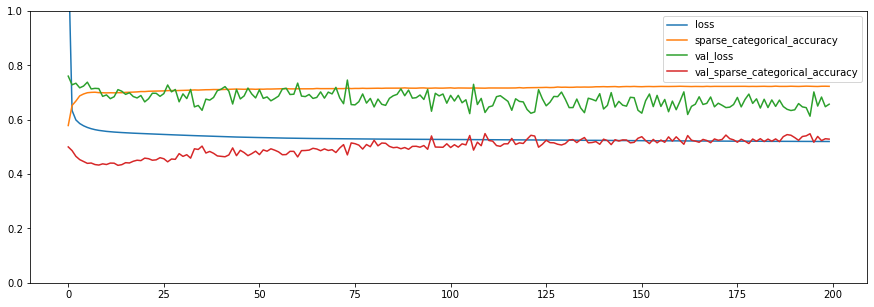

In [220]:
model_knn.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd" , #stochastic gradient descent
            metrics=["sparse_categorical_accuracy"])

history = model_knn.fit(pd.DataFrame(StandardScaler().fit_transform(X_knn_train), columns=X_knn_train.columns), y_knn_train, epochs=200,
         validation_data=(pd.DataFrame(StandardScaler().fit_transform(X_knn_valid), columns=X_knn_valid.columns), y_knn_valid),batch_size = 100)

pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.gca().set_ylim(0, 1)

The final accuracy is 0.72.

### 2.2 Logistic Regression
#### Mean dataset

In [221]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits=10, shuffle=True, random_state=42)

lr_steps = [
    ('standardize', StandardScaler()),
    ('model',LogisticRegression() )
]

lr_pipe = Pipeline(steps=lr_steps)

param_grid = [{'model__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

lr = GridSearchCV(lr_pipe, param_grid, n_jobs=9, cv=folds)

lr.fit(X_mean_train,y_mean_train)

print('{}, {}'.format(lr.best_params_, lr.best_score_))

{'model__C': 10}, 0.6957050892512258


/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Find parameter iteratively..

In [222]:
param_grid = [{'model__C':[5, 8, 10, 15, 20, 30, 50]}]

lr = GridSearchCV(lr_pipe, param_grid, n_jobs=7, cv=folds)

lr.fit(X_mean_train,y_mean_train)

print('{}, {}'.format(lr.best_params_, lr.best_score_))

{'model__C': 5}, 0.696521222721784


/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [223]:
param_grid = [{'model__C':[3, 4, 5, 6, 8]}]

lr = GridSearchCV(lr_pipe, param_grid, n_jobs=5, cv=folds)

lr.fit(X_mean_train,y_mean_train)

print('{}, {}'.format(lr.best_params_, lr.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'model__C': 6}, 0.6965912397820875


In [224]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

lr_pred_mean = lr.predict(X_mean_valid)

results_mean = {}
results_mean['lr:'] = 'Acc: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_mean_valid, lr_pred_mean),
                                                                    recall_score(y_mean_valid, lr_pred_mean),
                                                                    f1_score(y_mean_valid, lr_pred_mean)) 
results_mean['lr:']

'Acc: 0.5225, Recall: 0.9070, F1-Score: 0.1167'

#### KNN dataset

In [225]:
param_grid = [{'model__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

lr = GridSearchCV(lr_pipe, param_grid, n_jobs=9, cv=folds)

lr.fit(X_knn_train,y_knn_train)

print('{}, {}'.format(lr.best_params_, lr.best_score_))

{'model__C': 1000}, 0.6425501026619875


/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [226]:
param_grid = [{'model__C':[100, 500, 750, 1000, 1500, 2000, 3000, 5000, 10000]}]

lr = GridSearchCV(lr_pipe, param_grid, n_jobs=9, cv=folds)

lr.fit(X_knn_train,y_knn_train)

print('{}, {}'.format(lr.best_params_, lr.best_score_))

{'model__C': 1000}, 0.6425501026619875


/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [227]:
param_grid = [{'model__C':[800, 900, 950, 1000, 1050, 1100, 1200, 1300]}]

lr = GridSearchCV(lr_pipe, param_grid, n_jobs=7, cv=folds)

lr.fit(X_knn_train,y_knn_train)

print('{}, {}'.format(lr.best_params_, lr.best_score_))

{'model__C': 900}, 0.6425501026619875


/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [228]:
lr_pred_knn = lr.predict(X_knn_valid)

results_knn = {}
results_knn['lr:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_knn_valid, lr_pred_knn),
                                                                    recall_score(y_knn_valid, lr_pred_knn),
                                                                    f1_score(y_knn_valid, lr_pred_knn)) 
results_knn['lr:']

'Acc: 0.6283,Recall: 0.6163, F1-Score: 0.1034'

### 2.3 Random Foreset
#### mean dataset

In [230]:
from sklearn.ensemble import RandomForestClassifier


rf_steps = [
    ('standardize', StandardScaler()),
    ('model', RandomForestClassifier())
]

rf_pipe = Pipeline(steps=rf_steps)

param_grid = [{'model__n_estimators':[30, 50, 100, 120],
              'model__max_depth':[8, 14, 20]}]

rf = GridSearchCV(rf_pipe, param_grid, n_jobs=6, cv=folds)

rf.fit(X_mean_train,y_mean_train)

print('{}, {}'.format(rf.best_params_, rf.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


{'model__max_depth': 20, 'model__n_estimators': 100}, 0.9300936391863253


In [231]:
param_grid = [{'model__n_estimators':[80, 100, 110],
              'model__max_depth':[16, 20, 24]}]

rf = GridSearchCV(rf_pipe, param_grid, n_jobs=6, cv=folds)

rf.fit(X_mean_train,y_mean_train)

print('{}, {}'.format(rf.best_params_, rf.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


{'model__max_depth': 24, 'model__n_estimators': 110}, 0.9523153805030571


In [232]:
param_grid = [{'model__n_estimators':[110],
              'model__max_depth':[25, 30, 35]}]

rf = GridSearchCV(rf_pipe, param_grid, n_jobs=3, cv=folds)

rf.fit(X_mean_train,y_mean_train)

print('{}, {}'.format(rf.best_params_, rf.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


{'model__max_depth': 35, 'model__n_estimators': 110}, 0.9659329075942276


In [233]:
rf_pred_mean = rf.predict(X_mean_valid)

results_mean['rf:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_mean_valid, rf_pred_mean),
                                                                    recall_score(y_mean_valid, rf_pred_mean),
                                                                    f1_score(y_mean_valid, rf_pred_mean)) 
results_mean['rf:']

'Acc: 0.9153,Recall: 0.1047, F1-Score: 0.0791'

#### KNN dataset

In [234]:
param_grid = [{'model__n_estimators':[50, 70, 100, 120],
              'model__max_depth':[15, 23, 30]}]

rf = GridSearchCV(rf_pipe, param_grid, n_jobs=6, cv=folds)

rf.fit(X_knn_train,y_knn_train)

print('{}, {}'.format(rf.best_params_, rf.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


{'model__max_depth': 30, 'model__n_estimators': 120}, 0.9596511624870747


In [235]:
param_grid = [{'model__n_estimators':[110, 120, 130],
              'model__max_depth':[25, 30, 35]}]

rf = GridSearchCV(rf_pipe, param_grid, n_jobs=6, cv=folds)

rf.fit(X_knn_train,y_knn_train)

print('{}, {}'.format(rf.best_params_, rf.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


{'model__max_depth': 35, 'model__n_estimators': 120}, 0.9616103244275476


In [236]:
rf_pred_knn = rf.predict(X_knn_valid)

results_knn['rf:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_knn_valid, rf_pred_knn),
                                                                    recall_score(y_knn_valid, rf_pred_knn),
                                                                    f1_score(y_knn_valid, rf_pred_knn)) 
results_knn['rf:']

'Acc: 0.9165,Recall: 0.1802, F1-Score: 0.1305'

### 2.4 Linear SVM
#### mean dataset

In [237]:
from sklearn.svm import LinearSVC

lsvm_steps = [
    ('standardize', StandardScaler()),
    ('model', LinearSVC(max_iter=10000))
]

lsvm_pipe = Pipeline(steps=lsvm_steps)

param_grid = [{'model__C':[0.01, 0.1, 1, 10, 100]}]

lsvm = GridSearchCV(lsvm_pipe, param_grid, n_jobs=5, cv=folds)

lsvm.fit(X_mean_train,y_mean_train)

print('{}, {}'.format(lsvm.best_params_, lsvm.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'model__C': 1}, 0.7002520875164862


/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [238]:
param_grid = [{'model__C':[0.5, 0.8, 1, 5, 10]}]

lsvm = GridSearchCV(lsvm_pipe, param_grid, n_jobs=5, cv=folds)

lsvm.fit(X_mean_train,y_mean_train)

print('{}, {}'.format(lsvm.best_params_, lsvm.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'model__C': 0.8}, 0.700578514805316


/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [239]:
lsvm_pred_mean = lsvm.predict(X_mean_valid)

results_mean['lsvm:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_mean_valid, lsvm_pred_mean),
                                                                    recall_score(y_mean_valid, lsvm_pred_mean),
                                                                    f1_score(y_mean_valid, lsvm_pred_mean)) 
results_mean['lsvm:']

'Acc: 0.5187,Recall: 0.9128, F1-Score: 0.1165'

#### KNN dataset

In [240]:
param_grid = [{'model__C':[0.01, 0.1, 1, 10, 100]}]

lsvm = GridSearchCV(lsvm_pipe, param_grid, n_jobs=5, cv=folds)

lsvm.fit(X_knn_train,y_knn_train)

print('{}, {}'.format(lsvm.best_params_, lsvm.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'model__C': 100}, 0.6407543121081088


/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [241]:
param_grid = [{'model__C':[50, 100, 150, 200, 300]}]

lsvm = GridSearchCV(lsvm_pipe, param_grid, n_jobs=5, cv=folds)

lsvm.fit(X_knn_train,y_knn_train)

print('{}, {}'.format(lsvm.best_params_, lsvm.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'model__C': 50}, 0.6406143867349745


/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [242]:
lsvm_pred_knn = lsvm.predict(X_knn_valid)

results_knn['lsvm:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_knn_valid, lsvm_pred_knn),
                                                                    recall_score(y_knn_valid, lsvm_pred_knn),
                                                                    f1_score(y_knn_valid, lsvm_pred_knn)) 
results_knn['lsvm:']

'Acc: 0.6363,Recall: 0.6163, F1-Score: 0.1054'

### 2.5 RBF SVM

#### mean dataset

In [243]:
from sklearn.svm import SVC

rbfsvm_steps = [
    ('standardize', StandardScaler()),
    ('model',SVC(kernel='rbf'))
]

rbfsvm_pipe = Pipeline(steps=rbfsvm_steps)

param_grid = [{'model__C':[0.1, 1, 10, 100, 1000],
              'model__gamma':[0.000001, 0.00001, 0.00005,0.00008, 0.0001]}]

rbfsvm = GridSearchCV(rbfsvm_pipe, param_grid, n_jobs=5, cv=folds)

rbfsvm.fit(X_mean_train,y_mean_train)

print('{}, {}'.format(rbfsvm.best_params_, rbfsvm.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

give up owing to too low performance..

### 2.6 KNN
#### mean dataset

In [314]:
from sklearn.neighbors import KNeighborsClassifier

knn_steps = [
    ('standardize', StandardScaler()),
    ('model',KNeighborsClassifier())
]

knn_pipe = Pipeline(steps=knn_steps)

param_grid = [{'model__weights':['uniform', 'distance'],
              'model__p':[1, 2],
              'model__n_neighbors':[3, 5, 10, 20]}]

knn = GridSearchCV(knn_pipe, param_grid, n_jobs=8, cv=folds)

knn.fit(X_mean_train,y_mean_train)

print('{}, {}'.format(knn.best_params_, knn.best_score_))

{'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance'}, 0.8687452096738273


/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [245]:
knn_pred_mean = knn.predict(X_mean_valid)

results_mean['knn:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_mean_valid, knn_pred_mean),
                                                                    recall_score(y_mean_valid, knn_pred_mean),
                                                                    f1_score(y_mean_valid, knn_pred_mean)) 
results_mean['knn:']

'Acc: 0.7603,Recall: 0.5756, F1-Score: 0.1431'

####  KNN dataset

In [315]:
knn = GridSearchCV(knn_pipe, param_grid, n_jobs=8, cv=folds)

knn.fit(X_knn_train,y_knn_train)

print('{}, {}'.format(knn.best_params_, knn.best_score_))

{'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance'}, 0.8671753037210728


/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [316]:
knn_pred_knn = knn.predict(X_knn_valid)

results_knn['knn:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_knn_valid, knn_pred_knn),
                                                                    recall_score(y_knn_valid, knn_pred_knn),
                                                                    f1_score(y_knn_valid, knn_pred_knn)) 
results_knn['knn:']

'Acc: 0.7558,Recall: 0.5640, F1-Score: 0.1384'

### 2.7 Adaptive Boosting Classifier
#### mean dataset

In [248]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc_steps = [
    ('standardize', MinMaxScaler()),
    ('model',AdaBoostClassifier(random_state=42, base_estimator=DecisionTreeClassifier()))
]

abc_pipe = Pipeline(steps=abc_steps)

param_grid = [{'model__base_estimator__max_depth':[4, 8, 12],
              'model__n_estimators':[10, 50, 100],
              'model__learning_rate':[0.5, 1, 2]}]

abc = GridSearchCV(abc_pipe, param_grid, n_jobs=6, cv=folds)

abc.fit(X_mean_train,y_mean_train)

print('{}, {}'.format(abc.best_params_, abc.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'model__base_estimator__max_depth': 12, 'model__learning_rate': 0.5, 'model__n_estimators': 100}, 0.9675185544937935


In [249]:
abc_pred_mean =abc.predict(X_mean_valid)

results_mean['abc:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_mean_valid,abc_pred_mean),
                                                                    recall_score(y_mean_valid, abc_pred_mean),
                                                                    f1_score(y_mean_valid, abc_pred_mean)) 
results_mean['abc:']

'Acc: 0.9268,Recall: 0.1047, F1-Score: 0.0905'

#### KNN dataset

In [319]:
param_grid = [{'model__base_estimator__max_depth':[4, 8, 12],
              'model__n_estimators':[10, 50, 100],
              'model__learning_rate':[0.5, 1, 2]}]

abc = GridSearchCV(abc_pipe, param_grid, n_jobs=6, cv=folds)

abc.fit(X_knn_train,y_knn_train)

print('{}, {}'.format(abc.best_params_, abc.best_score_))

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'model__base_estimator__max_depth': 12, 'model__learning_rate': 0.5, 'model__n_estimators': 100}, 0.9650853064976029


In [320]:
abc_pred_knn = abc.predict(X_knn_valid)

results_knn['abc:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_knn_valid, abc_pred_knn),
                                                                    recall_score(y_knn_valid, abc_pred_knn),
                                                                    f1_score(y_knn_valid, abc_pred_knn)) 
results_knn['abc:']

'Acc: 0.9313,Recall: 0.1570, F1-Score: 0.1371'

A view of model validation scores.

In [252]:
results_mean['nn:'] = 'Acc: 0.73'
results_knn['nn:'] = 'Acc: 0.72'

In [321]:
for i in results_mean:
    print(i + '\t' +  results_mean[i])
    #print(i + '\t' +  results_knn[i])
print('\n')
for i in results_knn:
    #print(i + '\t' +  results_mean[i])
    print(i + '\t' +  results_knn[i])

lr:	Acc: 0.5225, Recall: 0.9070, F1-Score: 0.1167
rf:	Acc: 0.9153,Recall: 0.1047, F1-Score: 0.0791
lsvm:	Acc: 0.5187,Recall: 0.9128, F1-Score: 0.1165
knn:	Acc: 0.7603,Recall: 0.5756, F1-Score: 0.1431
abc:	Acc: 0.9268,Recall: 0.1047, F1-Score: 0.0905
nn:	Acc: 0.73


lr:	Acc: 0.6283,Recall: 0.6163, F1-Score: 0.1034
rf:	Acc: 0.9165,Recall: 0.1802, F1-Score: 0.1305
lsvm:	Acc: 0.6363,Recall: 0.6163, F1-Score: 0.1054
knn:	Acc: 0.7558,Recall: 0.5640, F1-Score: 0.1384
abc:	Acc: 0.9313,Recall: 0.1570, F1-Score: 0.1371
nn:	Acc: 0.72


In [269]:
y_mean_valid.mean()

Fraud (in next year)    0.034769
dtype: float64

Since 1 is only 3.5% of all samples, the recall rate is of higher reference value than accuracy.

Therefore, LR, LSVM, KNN is chosen for both datasets

## 3. Model Evaluation on Test Dataset

### 3.1 Logistic Regression

#### mean dataset

In [278]:
lr_steps = [
    ('standardize', StandardScaler()),
    ('model',LogisticRegression(C=6) )
]

lr_pipe = Pipeline(steps=lr_steps)


lr.fit(X_mean_train,y_mean_train)

lr_pred_mean = lr.predict(X_mean_test)

score_mean = {}
score_mean['lr:'] = 'Acc: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_mean_test, lr_pred_mean),
                                                                    recall_score(y_mean_test, lr_pred_mean),
                                                                    f1_score(y_mean_test, lr_pred_mean)) 
score_mean['lr:']

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'Acc: 0.3100, Recall: 0.8447, F1-Score: 0.0739'

#### KNN dataset

In [279]:
lr_steps = [
    ('standardize', StandardScaler()),
    ('model',LogisticRegression(C=900) )
]

lr_pipe = Pipeline(steps=lr_steps)


lr.fit(X_knn_train,y_knn_train)

lr_pred_knn = lr.predict(X_knn_test)

score_knn = {}
score_knn['lr:'] = 'Acc: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_knn_test, lr_pred_knn),
                                                                    recall_score(y_knn_test, lr_pred_knn),
                                                                    f1_score(y_knn_test, lr_pred_knn)) 
score_knn['lr:']

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'Acc: 0.6058, Recall: 0.2733, F1-Score: 0.0432'

### 3.2 LSVM

#### mean dataset

In [280]:
lsvm_steps = [
    ('standardize', StandardScaler()),
    ('model', LinearSVC(max_iter=10000, C=0.8))
]

lsvm_pipe = Pipeline(steps=lsvm_steps)

lsvm.fit(X_mean_train,y_mean_train)

lsvm_pred_mean = lsvm.predict(X_mean_test)

score_mean['lsvm:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_mean_test, lsvm_pred_mean),
                                                                    recall_score(y_mean_test, lsvm_pred_mean),
                                                                    f1_score(y_mean_test, lsvm_pred_mean)) 
score_mean['lsvm:']

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


'Acc: 0.3337,Recall: 0.8447, F1-Score: 0.0763'

#### knn dataset

In [282]:
lsvm_steps = [
    ('standardize', StandardScaler()),
    ('model', LinearSVC(max_iter=10000, C=50))
]

lsvm_pipe = Pipeline(steps=lsvm_steps)

lsvm.fit(X_knn_train,y_knn_train)

lsvm_pred_knn = lsvm.predict(X_knn_test)

score_knn['lsvm:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_knn_test, lsvm_pred_knn),
                                                                    recall_score(y_knn_test, lsvm_pred_knn),
                                                                    f1_score(y_knn_test, lsvm_pred_knn)) 
score_knn['lsvm:']

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


'Acc: 0.6103,Recall: 0.2733, F1-Score: 0.0437'

### 3.3 KNN

#### mean dataset

In [283]:
knn_steps = [
    ('standardize', StandardScaler()),
    ('model',KNeighborsClassifier(weights='distance', p=1, n_neighbors=3))
]

knn_pipe = Pipeline(steps=knn_steps)

knn.fit(X_mean_train,y_mean_train)

knn_pred_mean = knn.predict(X_mean_test)

score_mean['knn:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_mean_test, knn_pred_mean),
                                                                    recall_score(y_mean_test, knn_pred_mean),
                                                                    f1_score(y_mean_test, knn_pred_mean)) 
score_mean['knn:']

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


'Acc: 0.6959,Recall: 0.4783, F1-Score: 0.0929'

#### knn dataset

In [284]:
knn.fit(X_knn_train,y_knn_train)

knn_pred_knn = knn.predict(X_knn_test)

score_knn['knn:'] = 'Acc: {:.4f},Recall: {:.4f}, F1-Score: {:.4f}'.format(accuracy_score(y_knn_test, knn_pred_knn),
                                                                    recall_score(y_knn_test, knn_pred_knn),
                                                                    f1_score(y_knn_test, knn_pred_knn)) 
score_knn['knn:']

/Users/huntermao/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


'Acc: 0.7151,Recall: 0.4720, F1-Score: 0.0974'

### 3.4 Final Results..

In [326]:
for i in score_mean:
    print(i + '\t' +  score_mean[i])
print('\n')
for i in score_knn:
    print(i + '\t' +  score_knn[i])

lr:	Acc: 0.3100, Recall: 0.8447, F1-Score: 0.0739
lsvm:	Acc: 0.3337,Recall: 0.8447, F1-Score: 0.0763
knn:	Acc: 0.6959,Recall: 0.4783, F1-Score: 0.0929


lr:	Acc: 0.6058, Recall: 0.2733, F1-Score: 0.0432
lsvm:	Acc: 0.6103,Recall: 0.2733, F1-Score: 0.0437
knn:	Acc: 0.7151,Recall: 0.4720, F1-Score: 0.0974


In terms of comprehensive efficiency and scores, the logistic regression with mean imputer was considered to be the champion.